# **Análisis Exploratorio Trabajo de Grado Presentado por:** Manuel Fabian Sarmiento Marquez

## **1. Contexto del Análisis**

Equipos y Controles Industriales ECI es un proveedor integral de tecnología industrial con un portafolio amplio de productos tales como válvulas, instrumentos de medición, analizadores de proceso, equipos para calibración y avanzados sistemas de control, también ofrecemos servicios “clase mundo” en ingeniería, instalación, configuración y puesta en marcha, así como servicios de mantenimiento para preservar el valor de la inversión durante el ciclo de vida de la planta.  

ECI tiene total cobertura nacional con oficinas en Barrancabermeja, Barranquilla, Bogotá, Cali, Cartagena y Medellín y centros de servicio en Barrancabermeja y Bogotá.  A nivel regional cuenta con oficinas en Ecuador en las ciudades de Quito y Esmeraldas, y desde 1978 cuenta con oficina logística en Miami.

## **2. Caracteristicas de la base de datos:**



Diccionario de datos

Tipoventas	:	Tipoventas

Numerodocumento	:	Numerodocumento

NumeroOriginal	:	NumeroOriginal

Fechadocumento	:	Fechadocumento

Numeroarticulo	:	Numeroarticulo

Descripcionarticulo	:	Descripcionarticulo

DescripcionGenerica	:	DescripcionGenerica

CodigoMarca	:	CodigoMarca

Marca	:	Marca

CodigoLinea	:	CodigoLinea

Linea	:	Linea

Numerocliente	:	Numerocliente

Nombrecliente	:	Nombrecliente

OCCLIENTE	:	OCCLIENTE

ClaseCliente	:	ClaseCliente

Secteconomico	:	Secteconomico

Dpto	:	Dpto

Departamento	:	Departamento

Estadoanulado	:	Estadoanulado

Estadodocumentoventas	:	Estadodocumentoventas

IdVendedor	:	IdVendedor

Vendedor	:	Vendedor

Mes	:	Mes

Cantidad	:	Cantidad

Preciounitario	:	Preciounitario

Precioextendido	:	Precioextendido

CostoUnitario	:	CostoUnitario

CostoExtendido	:	CostoExtendido

Empresa	:	Empresa

fechaVencimiento	:	fechaVencimiento

usuarioGp	:	usuarioGp

Ciudad	:	Ciudad

EstadoDepartamento	:	EstadoDepartamento

Pais	:	Pais

PRSTADCD	:	PRSTADCD

FechaRequerida	:	FechaRequerida

MonedaOriginal	:	MonedaOriginal

valorUnitarioMonedaOriginal	:	valorUnitarioMonedaOriginal

Moneda	:	Moneda

DireccionFacturacion	:	DireccionFacturacion

MetodoEntrega	:	MetodoEntrega

CondicionesPago	:	CondicionesPago

CREATDDT	:	CREATDDT


## **3. Carga de librerias y del dataset:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from locale import normalize


from scipy import stats
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose # descomposición de series
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  # Holwinters simple
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holwinters doble y tripe
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from sklearn.metrics import mean_squared_error
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#!pip install pmdarima
from pmdarima.arima import auto_arima
from pmdarima.utils import acf,pacf
from pmdarima.arima import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import pylab as py
from datetime import datetime

#!pip install install bayesian-optimization
from bayes_opt import BayesianOptimization
import warnings

In [2]:
df=pd.read_csv('eci_Pedidos_Reales.csv', delimiter=';', low_memory=False)
df.head(5)

,2,P61DIS-2024-0527,C61DIS-2024-0561,2024-04-30 00:00:00.000,13302-0201,CÁMARA TERMOGRÁFICA FLIR E6 PRO,CÁMARA TERMOGRÁFICA FLIR E6 PRO.1,22-12,Flir - Infrarojos para Medición de Temperatura,2212-02,...,COLOMBIA,PRINCIPAL,2024-04-30 00:00:00.000.2,12528676.00000,12528676.00000.1,$COL,PRINCIPAL,ENTREGA,30 DIAS,2024-04-30 00:00:00.000.3
0,2,P61DIS-2024-0526,C61DIS-2024-0560,2024-04-30 00:00:00.000,104-137,"MICROMETRO DE EXTERIORES 0-6""/0.001""","MICROMETRO DE EXTERIORES 0-6""/0.001""",21-01,Mitutoyo - Small Tools - Línea Uno,2101-01,...,COLOMBIA ...,PRINCIPAL,2024-06-30 00:00:00.000,2729929.80,1364964.90,$COL,PRINCIPAL,ENTREGA,45 DIAS,2024-04-30 00:00:00.000
1,2,P21DCC-2024-0207,C21DCC-2024-0570,2024-04-30 00:00:00.000,184-313S,GALGAS EPESORES 0.05mm-1mm,GALGAS EPESORES 0.05mm-1mm,21-01,Mitutoyo - Small Tools - Línea Uno,2101-01,...,COLOMBIA ...,PRINCIPAL,2024-04-30 00:00:00.000,872140.28,436070.14,$COL,PRINCIPAL,ENTREGA,45 DIAS,2024-04-30 00:00:00.000
2,2,P21DCC-2024-0211,C21DCC-2024-0613,2024-04-30 00:00:00.000,500-196-30,"CALIBRADOR PIE DE REY DIGITAL DE 6""-150mm /0.0...","CALIBRADOR PIE DE REY DIGITAL DE 6""-150mm /0.0...",21-01,Mitutoyo - Small Tools - Línea Uno,2101-01,...,COLOMBIA ...,PRINCIPAL,2024-04-30 00:00:00.000,1596268.00,798134.00,$COL,PRINCIPAL,ENTREGA,30 DIAS,2024-04-30 00:00:00.000
3,2,P21DCC-2024-0212,C21DCC-2024-0492,2024-04-30 00:00:00.000,500-197-30,"CALIBRADOR PIE DE REY DIGITAL 8""-200mm/0.01mm...","CALIBRADOR PIE DE REY DIGITAL 8""-200mm/0.01mm...",21-01,Mitutoyo - Small Tools - Línea Uno,2101-01,...,COLOMBIA ...,PRINCIPAL,2024-04-30 00:00:00.000,1149995.00,1149995.00,$COL,PRINCIPAL,ENTREGA,CONTADO,2024-04-30 00:00:00.000
4,2,P21DCC-2024-0213,C21DCC-2024-0208,2024-04-30 00:00:00.000,187-901,TRANSPORTADOR UNIVERSAL DE ANGULOS 150mm/300mm,TRANSPORTADOR UNIVERSAL DE ANGULOS 150mm/300mm,21-01,Mitutoyo - Small Tools - Línea Uno,2101-01,...,COLOMBIA ...,PRINCIPAL,2024-04-30 00:00:00.000,3500364.00,1750182.00,$COL,PRINCIPAL,ENTREGA,30 DIAS,2024-04-30 00:00:00.000


## **4. Análisis del Dataset**

### Análisis General:

In [3]:
# Forma del dataframe (filas, columnas)
df.shape

(211643, 43)

In [4]:
df.columns = ['Tipoventas', 'Numerodocumento', 'NumeroOriginal', 'Fechadocumento',
       'Numeroarticulo', 'Descripcionarticulo', 'DescripcionGenerica',
       'CodigoMarca', 'Marca', 'CodigoLinea', 'Linea', 'Numerocliente',
       'Nombrecliente', 'OCCLIENTE', 'ClaseCliente', 'Secteconomico', 'Dpto',
       'Departamento', 'Estadoanulado', 'Estadodocumentoventas', 'IdVendedor',
       'Vendedor', 'Mes', 'Cantidad', 'Preciounitario', 'Precioextendido',
       'CostoUnitario', 'CostoExtendido', 'Empresa', 'fechaVencimiento',
       'usuarioGp', 'Ciudad', 'EstadoDepartamento', 'Pais', 'PRSTADCD',
       'FechaRequerida', 'MonedaOriginal', 'valorUnitarioMonedaOriginal',
       'Moneda', 'DireccionFacturacion', 'MetodoEntrega', 'CondicionesPago',
       'CREATDDT']

In [5]:
df = df[['Fechadocumento','Descripcionarticulo','Marca','Cantidad']]

In [6]:
# Nombre de variables
df.columns

Index(['Fechadocumento', 'Descripcionarticulo', 'Marca', 'Cantidad'], dtype='object')

In [7]:
# Tipo de datos
df.dtypes

Fechadocumento         object
Descripcionarticulo    object
Marca                  object
Cantidad                int64
dtype: object

In [8]:
#Análisis descriptivo de variables numéricas
df.describe()

,Cantidad
count,2.116430e+05
mean,8.967308e+00
std,2.825830e+03
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,1.300000e+06


In [9]:
#Análisis descriptivo de variables categóricas para ver cuáles son valores cualitativos más recurrentes:
df.describe(include = 'object').T

,count,unique,top,freq
Fechadocumento,211643,5161,2018-09-10 00:00:00.000,422
Descripcionarticulo,211259,29560,SERVICIO,6212
Marca,198186,107,Mitutoyo - Small Tools - Línea Uno,73613


In [10]:
#Revisando número de valores únicos por variable
df.nunique()

Fechadocumento          5161
Descripcionarticulo    29560
Marca                    107
Cantidad                 178
dtype: int64

In [11]:
#Verificando datos nulos
df.isnull().sum()

Fechadocumento             0
Descripcionarticulo      384
Marca                  13457
Cantidad                   0
dtype: int64

In [12]:
#Dimensionando a nivel porcentual a cuánto, del total de los datos, corresponden los datos nulos
df.isnull().sum()/len(df)*100

Fechadocumento         0.000000
Descripcionarticulo    0.181438
Marca                  6.358349
Cantidad               0.000000
dtype: float64

### Tratamiento de datos nulos y Duplicados:

In [13]:
Marcas = df.Marca.unique()
df_marcas = pd.DataFrame(Marcas)
df_marcas.to_csv('Marcas.csv', index=False)
df_marcas

,0
0,Mitutoyo - Small Tools - Línea Uno
1,Servicios Laboratorio de Metrologia
2,Krohne
3,MTL Instrumens Group
4,Limitorque
...,...
103,El-O-Matic NO UTILIZAR
104,Faro Technologies NO UTILIZAR
105,Oneprod
106,Creaform NO UTILIZAR


In [14]:
Productos = df.Descripcionarticulo.unique()
df_Productos = pd.DataFrame(Productos)
df_Productos.to_csv('Marcas.csv', index=False)
df_Productos

,0
0,"MICROMETRO DE EXTERIORES 0-6""/0.001"""
1,GALGAS EPESORES 0.05mm-1mm
2,"CALIBRADOR PIE DE REY DIGITAL DE 6""-150mm /0.0..."
3,"CALIBRADOR PIE DE REY DIGITAL 8""-200mm/0.01mm..."
4,TRANSPORTADOR UNIVERSAL DE ANGULOS 150mm/300mm
...,...
29556,"VALVULA DE BOLA DE 3"" ANSI 300. MARCA WKM"
29557,SOFTWARE Y CABLE
29558,MODULO PARA SEÑAL LUMINOSA
29559,FUENTE DE PODER REDUNDANTE


In [15]:
#se eliminan datos nullos  así como los valores en blanco, los valores correspondientes a servicios y los valores de Laboratorio
df = df.dropna(subset = ['Marca'])
df = df.dropna(subset = ['Descripcionarticulo'])
df = df[df['Marca']!='']


In [16]:
df.isnull().sum()/len(df)*100

Fechadocumento         0.0
Descripcionarticulo    0.0
Marca                  0.0
Cantidad               0.0
dtype: float64

### Preparación de columnas para análisis:

In [17]:
df_final = df
df_final['Fechadocumento'] = pd.to_datetime(df['Fechadocumento'])
#df_final.set_index('Fechadocumento', inplace=True)
df_final.head(5)

,Fechadocumento,Descripcionarticulo,Marca,Cantidad
0,2024-04-30,"MICROMETRO DE EXTERIORES 0-6""/0.001""",Mitutoyo - Small Tools - Línea Uno,2
1,2024-04-30,GALGAS EPESORES 0.05mm-1mm,Mitutoyo - Small Tools - Línea Uno,2
2,2024-04-30,"CALIBRADOR PIE DE REY DIGITAL DE 6""-150mm /0.0...",Mitutoyo - Small Tools - Línea Uno,2
3,2024-04-30,"CALIBRADOR PIE DE REY DIGITAL 8""-200mm/0.01mm...",Mitutoyo - Small Tools - Línea Uno,1
4,2024-04-30,TRANSPORTADOR UNIVERSAL DE ANGULOS 150mm/300mm,Mitutoyo - Small Tools - Línea Uno,2


### Análisis Univariado:

C:\Users\manue\AppData\Local\Temp\ipykernel_16828\3637594063.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "Marca", x = 'Cantidad', data = Marcas, palette= "husl")


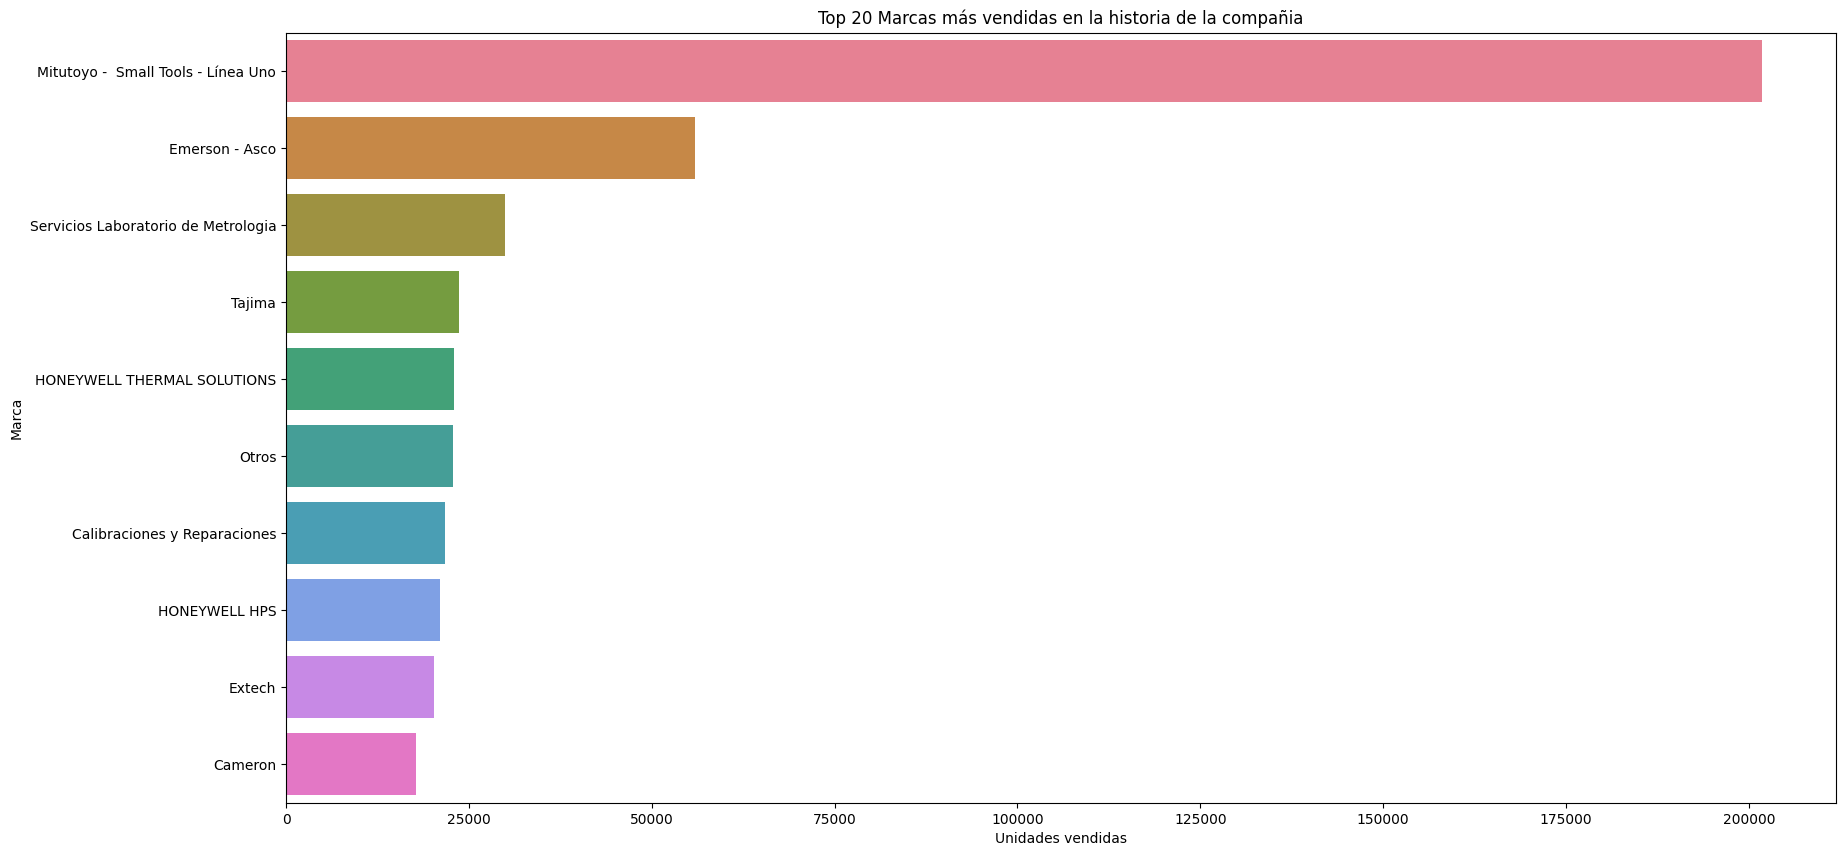

In [18]:
Marcas=df_final.groupby(['Marca'])['Cantidad'].sum().reset_index().sort_values(by=['Cantidad'],ascending=False)[:10]

plt.figure(figsize=(20,10))
sns.barplot(y = "Marca", x = 'Cantidad', data = Marcas, palette= "husl")
plt.title("Top 20 Marcas más vendidas en la historia de la compañia")
plt.xlabel("Unidades vendidas")
plt.ylabel("Marca")
plt.show()

In [19]:
df_final = df_final[df_final['Marca'] =='Mitutoyo -  Small Tools - Línea Uno']
df_final = df_final[['Fechadocumento','Descripcionarticulo','Cantidad']]
df_final

,Fechadocumento,Descripcionarticulo,Cantidad
0,2024-04-30,"MICROMETRO DE EXTERIORES 0-6""/0.001""",2
1,2024-04-30,GALGAS EPESORES 0.05mm-1mm,2
2,2024-04-30,"CALIBRADOR PIE DE REY DIGITAL DE 6""-150mm /0.0...",2
3,2024-04-30,"CALIBRADOR PIE DE REY DIGITAL 8""-200mm/0.01mm...",1
4,2024-04-30,TRANSPORTADOR UNIVERSAL DE ANGULOS 150mm/300mm,2
...,...,...,...
211542,2004-01-06,COMPARADOR DE DIAMETROS INTERIORES 18-35mm,1
211571,2003-12-15,RELOJ COMPARADOR 2mm,1
211620,2001-09-02,"MICROMETRO DE EXTRIORES 3""-4""/0.001""",1
211623,2001-04-25,"MEDIDOR DE ESPESORES 0.05""/0.0001""",2


C:\Users\manue\AppData\Local\Temp\ipykernel_16828\1711718830.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "Descripcionarticulo", x = 'Cantidad', data = Mas_Vendidos, palette= "husl")


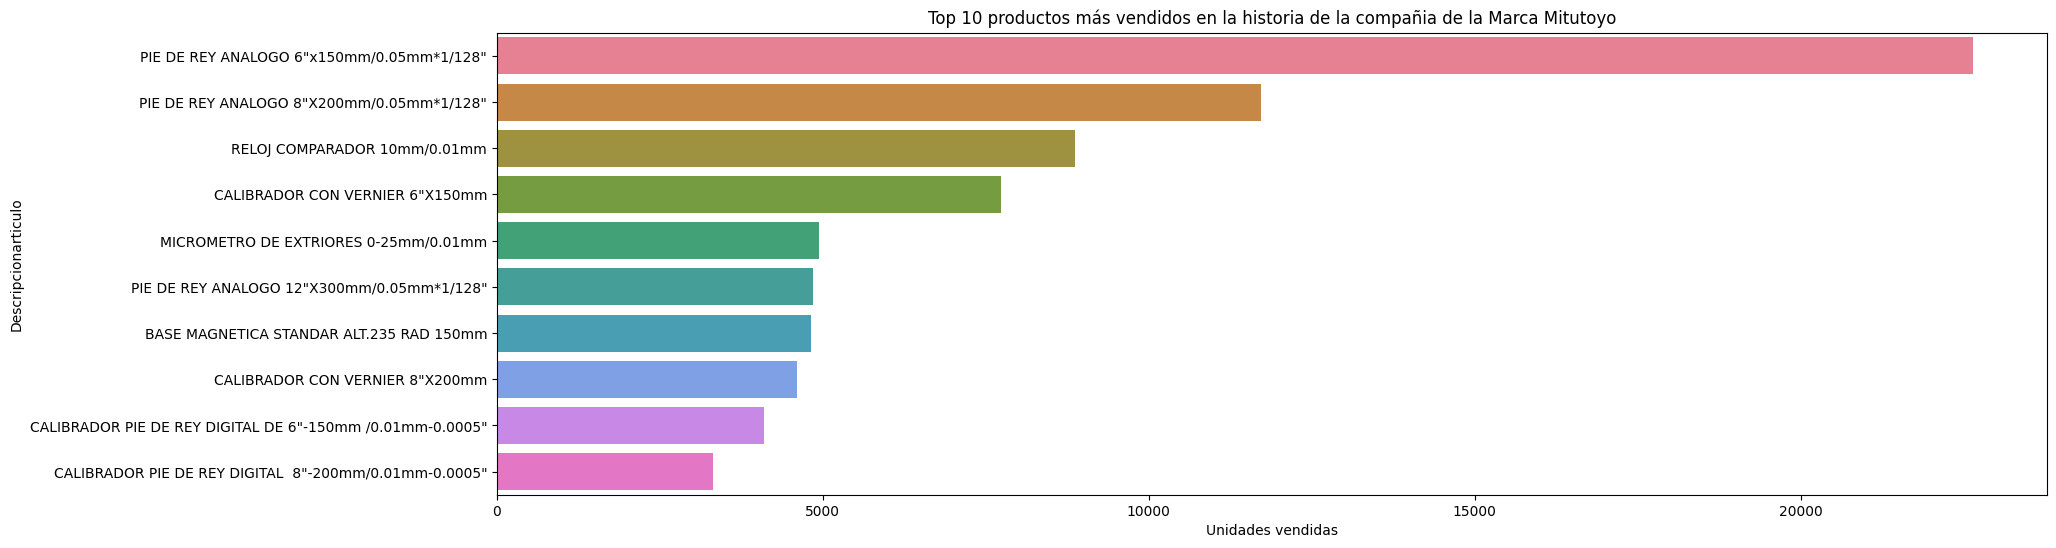

,Descripcionarticulo,Cantidad
2050,"PIE DE REY ANALOGO 6""x150mm/0.05mm*1/128""",22647
2052,"PIE DE REY ANALOGO 8""X200mm/0.05mm*1/128""",11719
2382,RELOJ COMPARADOR 10mm/0.01mm,8865
387,"CALIBRADOR CON VERNIER 6""X150mm",7729
1428,MICROMETRO DE EXTRIORES 0-25mm/0.01mm,4942
2042,"PIE DE REY ANALOGO 12""X300mm/0.05mm*1/128""",4850
187,BASE MAGNETICA STANDAR ALT.235 RAD 150mm,4813
392,"CALIBRADOR CON VERNIER 8""X200mm",4604
562,"CALIBRADOR PIE DE REY DIGITAL DE 6""-150mm /0.0...",4098
556,"CALIBRADOR PIE DE REY DIGITAL 8""-200mm/0.01mm...",3316


In [20]:
Mas_Vendidos=df_final.groupby(['Descripcionarticulo'])['Cantidad'].sum().reset_index().sort_values(by=['Cantidad'],ascending=False)[:10]

plt.figure(figsize=(20,6))
sns.barplot(y = "Descripcionarticulo", x = 'Cantidad', data = Mas_Vendidos, palette= "husl")
plt.title("Top 10 productos más vendidos en la historia de la compañia de la Marca Mitutoyo")
plt.xlabel("Unidades vendidas")
plt.ylabel("Descripcionarticulo")

plt.show()
Mas_Vendidos

C:\Users\manue\AppData\Local\Temp\ipykernel_16828\3929978039.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "Descripcionarticulo", x = 'Cantidad', data = Mas_Vendidos, palette= "husl")


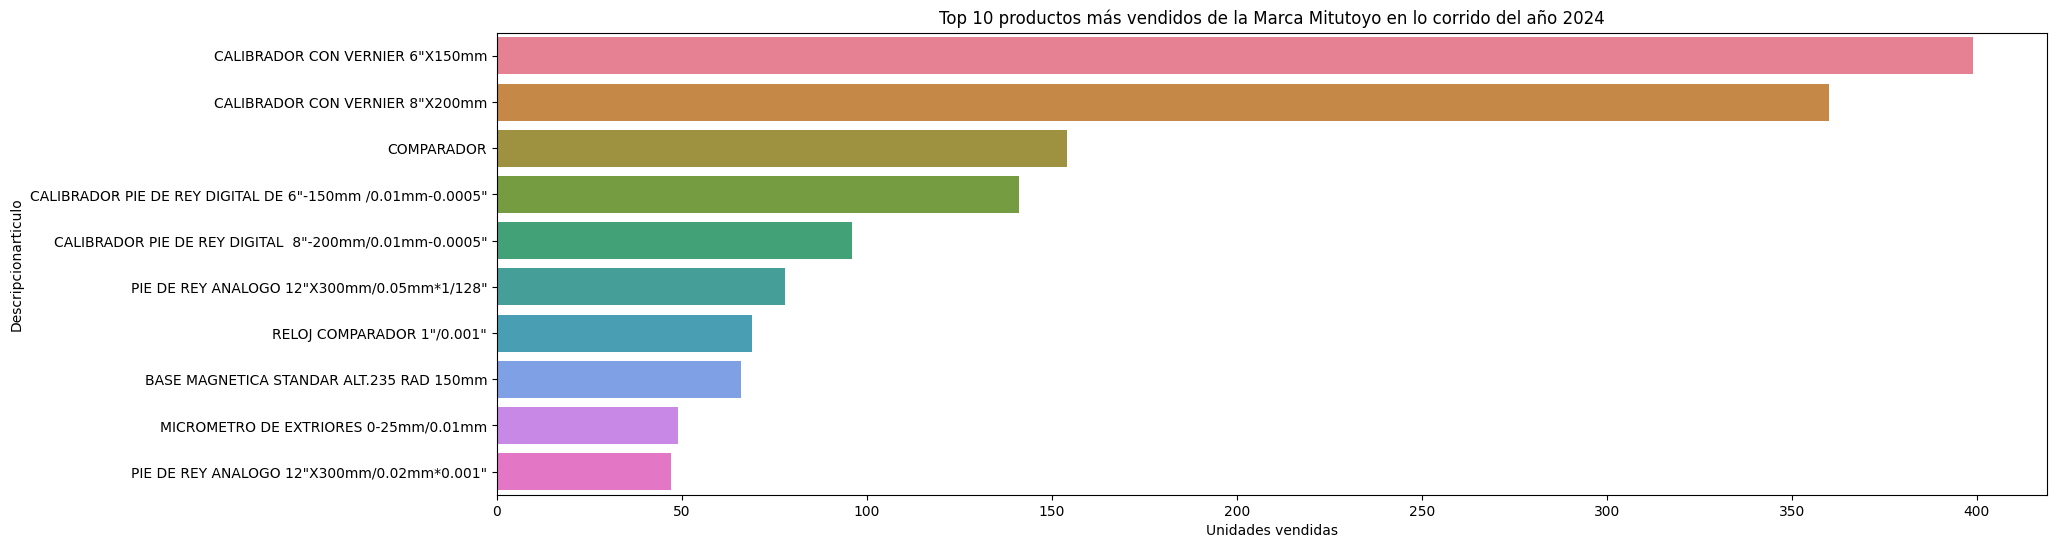

In [21]:
df_ultimo_año = df_final[df_final['Fechadocumento'].dt.year == 2024]
Mas_Vendidos=df_ultimo_año.groupby(['Descripcionarticulo'])['Cantidad'].sum().reset_index().sort_values(by=['Cantidad'],ascending=False)[:10]

plt.figure(figsize=(20,6))
sns.barplot(y = "Descripcionarticulo", x = 'Cantidad', data = Mas_Vendidos, palette= "husl")
plt.title("Top 10 productos más vendidos de la Marca Mitutoyo en lo corrido del año 2024")
plt.xlabel("Unidades vendidas")
plt.ylabel("Descripcionarticulo")
plt.show()

In [22]:
Mas_Vendidos

,Descripcionarticulo,Cantidad
30,"CALIBRADOR CON VERNIER 6""X150mm",399
31,"CALIBRADOR CON VERNIER 8""X200mm",360
55,COMPARADOR,154
52,"CALIBRADOR PIE DE REY DIGITAL DE 6""-150mm /0.0...",141
51,"CALIBRADOR PIE DE REY DIGITAL 8""-200mm/0.01mm...",96
187,"PIE DE REY ANALOGO 12""X300mm/0.05mm*1/128""",78
218,"RELOJ COMPARADOR 1""/0.001""",69
13,BASE MAGNETICA STANDAR ALT.235 RAD 150mm,66
119,MICROMETRO DE EXTRIORES 0-25mm/0.01mm,49
186,"PIE DE REY ANALOGO 12""X300mm/0.02mm*0.001""",47


In [23]:
df_final.dtypes

Fechadocumento         datetime64[ns]
Descripcionarticulo            object
Cantidad                        int64
dtype: object

In [24]:
#Mas_Vendidos.to_csv('Mas_Vendidos.csv', index=False)

In [25]:
top_vendidos = Mas_Vendidos['Descripcionarticulo'].iloc[:5].to_numpy()
top_vendidos

array(['CALIBRADOR CON VERNIER 6"X150mm',
       'CALIBRADOR CON VERNIER 8"X200mm', 'COMPARADOR',
       'CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.01mm-0.0005"',
       'CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm-0.0005"'],
      dtype=object)

In [26]:
nombres_productos = top_vendidos
nombres_productos

array(['CALIBRADOR CON VERNIER 6"X150mm',
       'CALIBRADOR CON VERNIER 8"X200mm', 'COMPARADOR',
       'CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.01mm-0.0005"',
       'CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm-0.0005"'],
      dtype=object)

In [27]:
resample_kind = 'MS'
start_date = '2004-01-01'

In [28]:
df_final

,Fechadocumento,Descripcionarticulo,Cantidad
0,2024-04-30,"MICROMETRO DE EXTERIORES 0-6""/0.001""",2
1,2024-04-30,GALGAS EPESORES 0.05mm-1mm,2
2,2024-04-30,"CALIBRADOR PIE DE REY DIGITAL DE 6""-150mm /0.0...",2
3,2024-04-30,"CALIBRADOR PIE DE REY DIGITAL 8""-200mm/0.01mm...",1
4,2024-04-30,TRANSPORTADOR UNIVERSAL DE ANGULOS 150mm/300mm,2
...,...,...,...
211542,2004-01-06,COMPARADOR DE DIAMETROS INTERIORES 18-35mm,1
211571,2003-12-15,RELOJ COMPARADOR 2mm,1
211620,2001-09-02,"MICROMETRO DE EXTRIORES 3""-4""/0.001""",1
211623,2001-04-25,"MEDIDOR DE ESPESORES 0.05""/0.0001""",2


In [29]:
df_grouped = df_final.copy()
df_grouped = df_grouped[df_grouped['Descripcionarticulo'] == top_vendidos[0]]
df_grouped = df_grouped[df_grouped['Fechadocumento'] >= '2021-06-01']
df_grouped = df_grouped[['Fechadocumento','Cantidad']]
df_grouped.set_index('Fechadocumento', inplace=True)
df_grouped = df_grouped.sort_index(ascending=True)
df_grouped = df_grouped.resample(resample_kind).sum() 
df_grouped = df_grouped.sort_index(ascending=True)
df_grouped = df_grouped.rename(columns={'Cantidad': top_vendidos[0]})
print("Desde:", df_grouped.index[0])
print("Hasta:", df_grouped.index[-1])
df_grouped.count()

Desde: 2021-09-01 00:00:00
Hasta: 2024-04-01 00:00:00


CALIBRADOR CON VERNIER 6"X150mm    32
dtype: int64

In [30]:
df_grouped2 = df_final.copy()
df_grouped2 = df_grouped2[df_grouped2['Descripcionarticulo'] == top_vendidos[1]]
df_grouped2 = df_grouped2[df_grouped2['Fechadocumento'] >= '2021-09-01']
df_grouped2 = df_grouped2[['Fechadocumento','Cantidad']]
df_grouped2.set_index('Fechadocumento', inplace=True)
df_grouped2 = df_grouped2.sort_index(ascending=True)
df_grouped2 = df_grouped2.resample(resample_kind).sum() 
df_grouped2 = df_grouped2.sort_index(ascending=True)
df_grouped2 = df_grouped2.rename(columns={'Cantidad': top_vendidos[1]})
print("Desde:", df_grouped2.index[0])
print("Hasta:", df_grouped2.index[-1])
df_grouped2.count()

Desde: 2021-09-01 00:00:00
Hasta: 2024-04-01 00:00:00


CALIBRADOR CON VERNIER 8"X200mm    32
dtype: int64

In [31]:
df_grouped3 = df_final.copy()
df_grouped3 = df_grouped3[df_grouped3['Descripcionarticulo'] == top_vendidos[2]]
df_grouped3 = df_grouped3[df_grouped3['Fechadocumento'] >= start_date]
df_grouped3 = df_grouped3[['Fechadocumento','Cantidad']]
df_grouped3.set_index('Fechadocumento', inplace=True)
df_grouped3 = df_grouped3.sort_index(ascending=True)
df_grouped3 = df_grouped3.resample(resample_kind).sum()
df_grouped3 = df_grouped3.sort_index(ascending=True)
df_grouped3 = df_grouped3.rename(columns={'Cantidad': top_vendidos[2]})
print("Desde:", df_grouped3.index[0])
print("Hasta:", df_grouped3.index[-1])
df_grouped3.count()

Desde: 2021-12-01 00:00:00
Hasta: 2024-04-01 00:00:00


COMPARADOR    29
dtype: int64

In [32]:
df_grouped4 = df_final.copy()
df_grouped4 = df_grouped4[df_grouped4['Descripcionarticulo'] == top_vendidos[3]]
df_grouped4 = df_grouped4[df_grouped4['Fechadocumento'] >= start_date]
df_grouped4 = df_grouped4[['Fechadocumento','Cantidad']]
df_grouped4.set_index('Fechadocumento', inplace=True)
df_grouped4 = df_grouped4.sort_index(ascending=True)
df_grouped4 = df_grouped4.resample(resample_kind).sum() 
df_grouped4 = df_grouped4.sort_index(ascending=True)
df_grouped4 = df_grouped4.rename(columns={'Cantidad': top_vendidos[3]})
print("Desde:", df_grouped4.index[0])
print("Hasta:", df_grouped4.index[-1])
df_grouped4.count()

Desde: 2015-02-01 00:00:00
Hasta: 2024-04-01 00:00:00


CALIBRADOR PIE DE REY DIGITAL DE 6"-150mm /0.01mm-0.0005"    111
dtype: int64

In [33]:
df_grouped5 = df_final.copy()
df_grouped5 = df_grouped5[df_grouped5['Descripcionarticulo'] == top_vendidos[4]]
df_grouped5 = df_grouped5[df_grouped5['Fechadocumento'] >= start_date]
df_grouped5 = df_grouped5[['Fechadocumento','Cantidad']]
df_grouped5.set_index('Fechadocumento', inplace=True)
df_grouped5 = df_grouped5.sort_index(ascending=True)
df_grouped5 = df_grouped5.resample(resample_kind).sum() 
df_grouped5 = df_grouped5.sort_index(ascending=True)
df_grouped5 = df_grouped5.rename(columns={'Cantidad': top_vendidos[4]})
print("Desde:", df_grouped5.index[0])
print("Hasta:", df_grouped5.index[-1])
df_grouped5.count()

Desde: 2015-02-01 00:00:00
Hasta: 2024-04-01 00:00:00


CALIBRADOR PIE DE REY DIGITAL  8"-200mm/0.01mm-0.0005"    111
dtype: int64

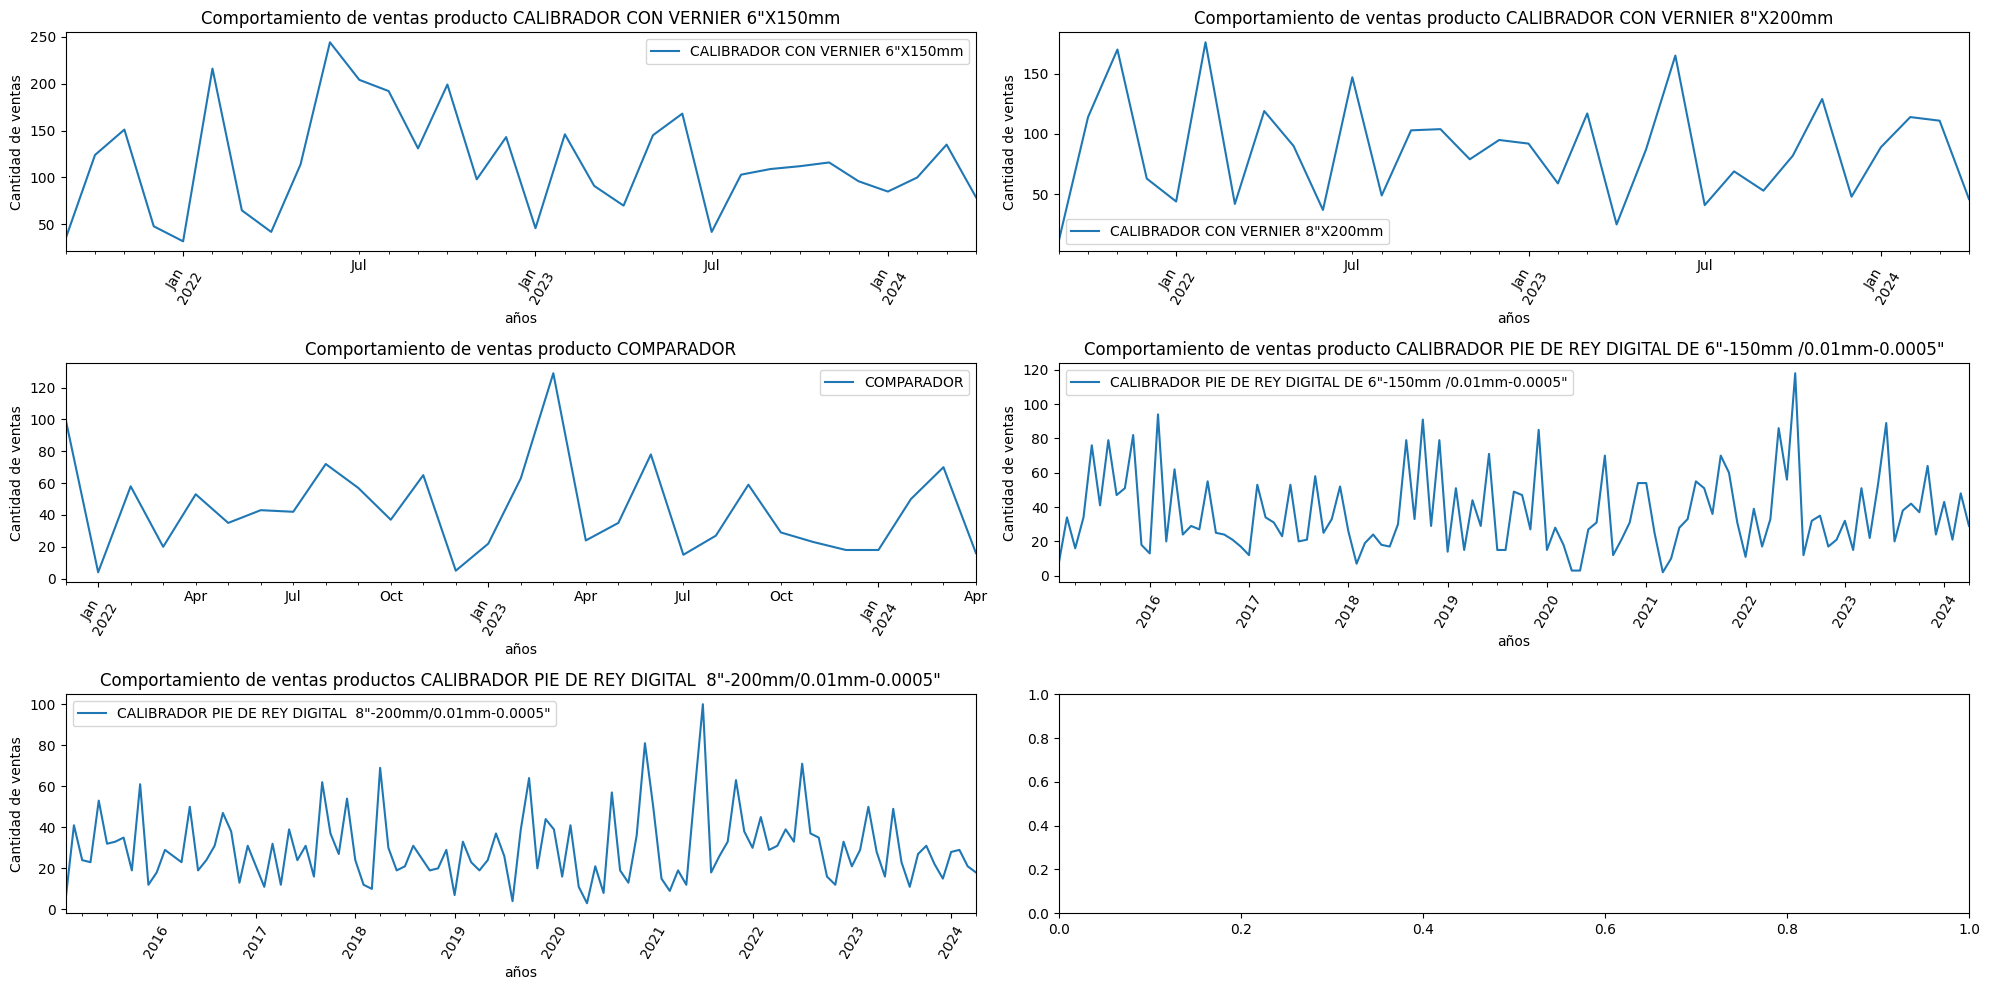

In [34]:
fig, axs = plt.subplots(figsize=[20, 10],ncols=2, nrows=3)

ax1=df_grouped.plot(kind="line",ax=axs[0,0])
ax1.set_title("Comportamiento de ventas producto "+ top_vendidos[0])
ax1.set_xlabel("años")
ax1.set_ylabel("Cantidad de ventas")
ax1.tick_params(axis='x', labelrotation=60)

ax2=df_grouped2.plot(kind="line",ax=axs[0,1])
ax2.set_title("Comportamiento de ventas producto "+ top_vendidos[1])
ax2.set_xlabel("años")
ax2.set_ylabel("Cantidad de ventas")
ax2.tick_params(axis='x', labelrotation=60)

ax3=df_grouped3.plot(kind="line",ax=axs[1,0])
ax3.set_title("Comportamiento de ventas producto "+ top_vendidos[2])
ax3.set_xlabel("años")
ax3.set_ylabel("Cantidad de ventas")
ax3.tick_params(axis='x', labelrotation=60)

ax4=df_grouped4.plot(kind="line",ax=axs[1,1])
ax4.set_title("Comportamiento de ventas producto "+ top_vendidos[3])
ax4.set_xlabel("años")
ax4.set_ylabel("Cantidad de ventas")
ax4.tick_params(axis='x', labelrotation=60)

ax5=df_grouped5.plot(kind="line",ax=axs[2,0])
ax5.set_title("Comportamiento de ventas productos "+ top_vendidos[4])
ax5.set_xlabel("años")
ax5.set_ylabel("Cantidad de ventas")
ax5.tick_params(axis='x', labelrotation=60)


fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Residuos')

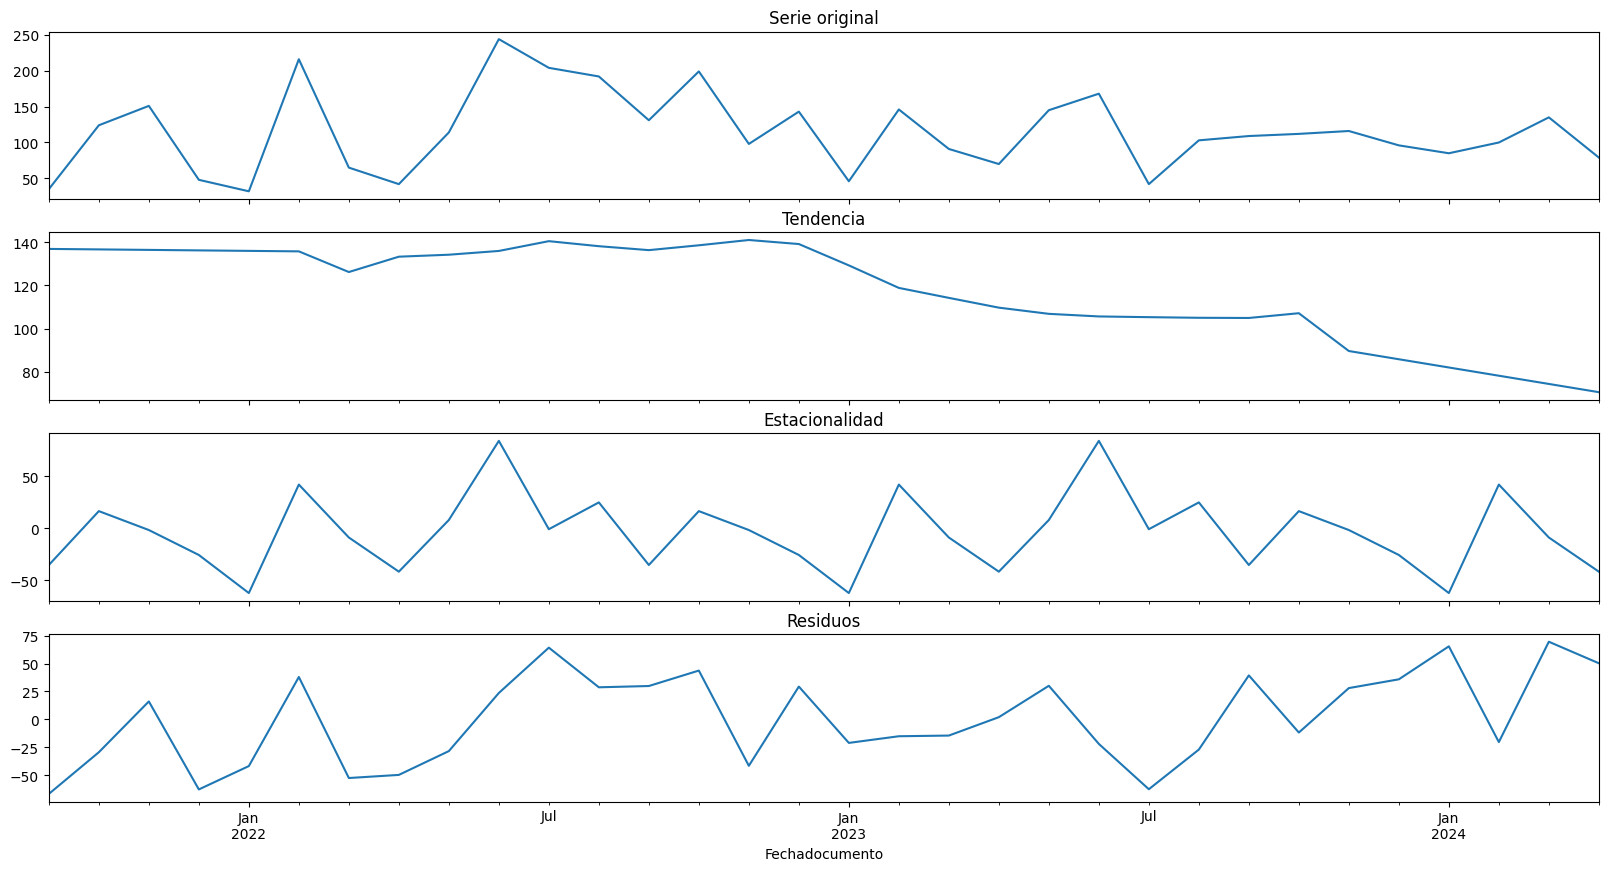

In [35]:
res_decompose_prod1 = seasonal_decompose(df_grouped[nombres_productos[0]], model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 10), sharex=True)
res_decompose_prod1.observed.plot(ax=axs[0])
axs[0].set_title('Serie original')
res_decompose_prod1.trend.plot(ax=axs[1])
axs[1].set_title('Tendencia')
res_decompose_prod1.seasonal.plot(ax=axs[2])
axs[2].set_title('Estacionalidad')
res_decompose_prod1.resid.plot(ax=axs[3])
axs[3].set_title('Residuos')



Text(0.5, 1.0, 'Residuos')

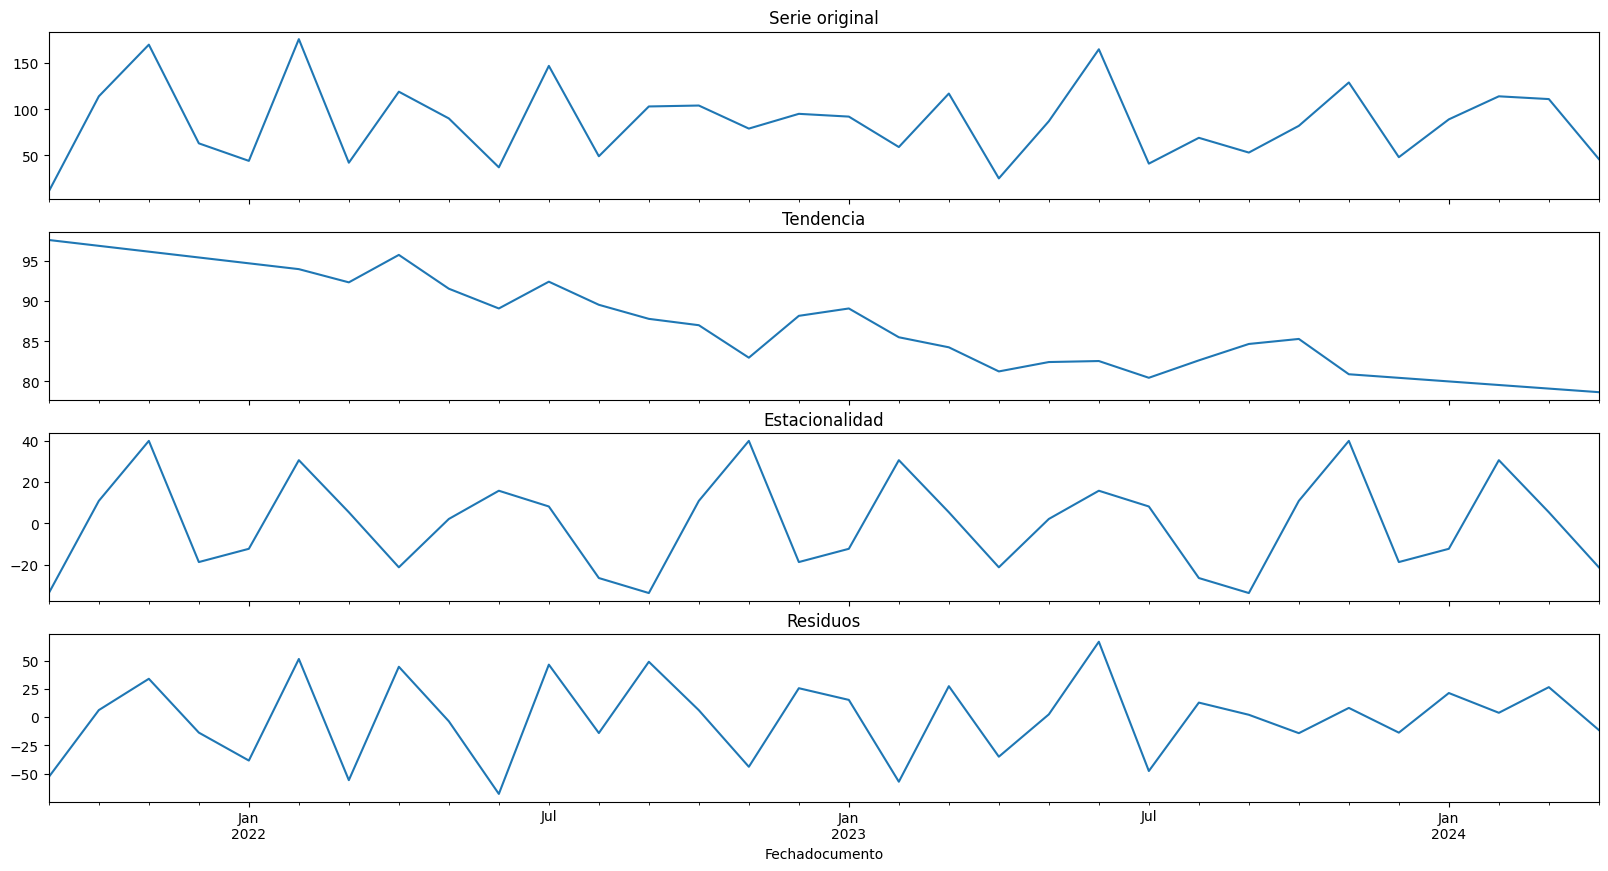

In [36]:
res_decompose_prod2 = seasonal_decompose(df_grouped2[nombres_productos[1]], model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 10), sharex=True)
res_decompose_prod2.observed.plot(ax=axs[0])
axs[0].set_title('Serie original')
res_decompose_prod2.trend.plot(ax=axs[1])
axs[1].set_title('Tendencia')
res_decompose_prod2.seasonal.plot(ax=axs[2])
axs[2].set_title('Estacionalidad')
res_decompose_prod2.resid.plot(ax=axs[3])
axs[3].set_title('Residuos')

Text(0.5, 1.0, 'Residuos')

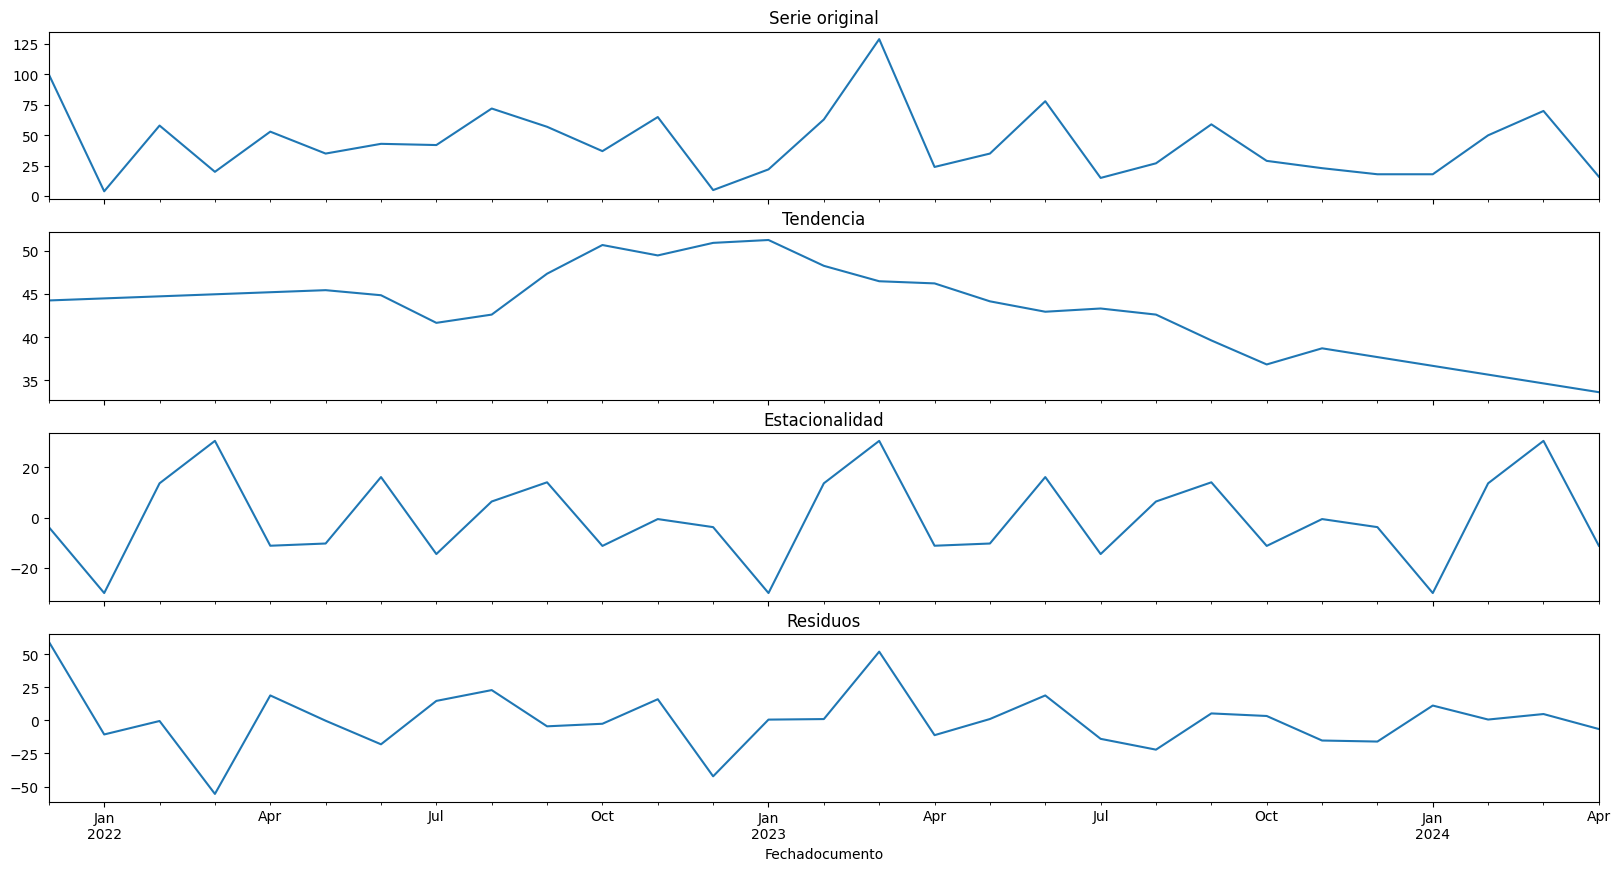

In [37]:
res_decompose_prod3 = seasonal_decompose(df_grouped3[nombres_productos[2]], model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 10), sharex=True)
res_decompose_prod3.observed.plot(ax=axs[0])
axs[0].set_title('Serie original')
res_decompose_prod3.trend.plot(ax=axs[1])
axs[1].set_title('Tendencia')
res_decompose_prod3.seasonal.plot(ax=axs[2])
axs[2].set_title('Estacionalidad')
res_decompose_prod3.resid.plot(ax=axs[3])
axs[3].set_title('Residuos')

Text(0.5, 1.0, 'Residuos')

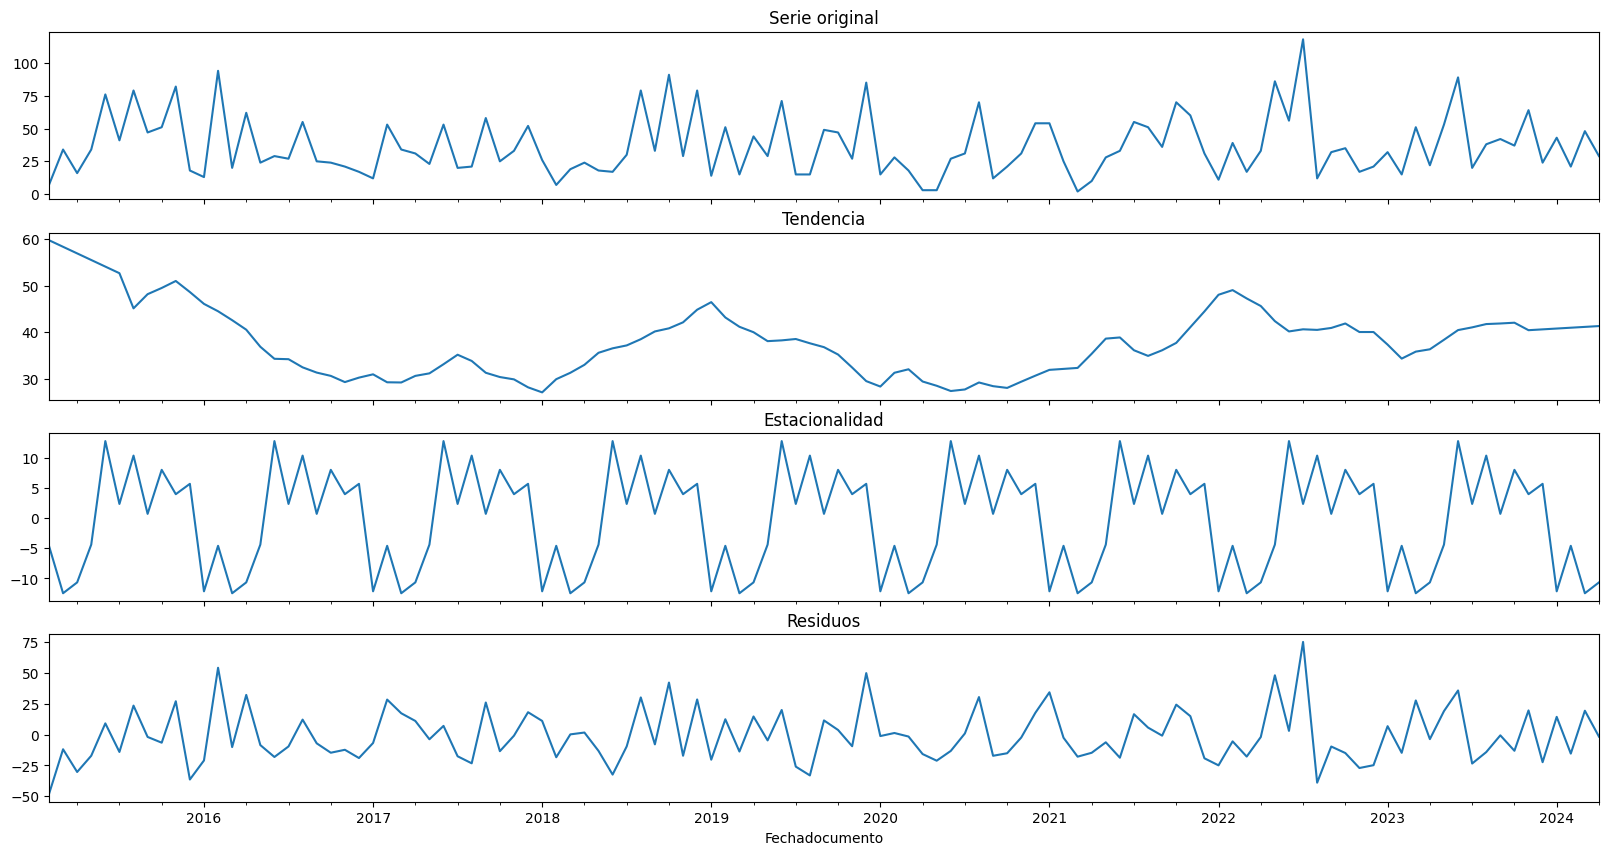

In [38]:
res_decompose_prod4 = seasonal_decompose(df_grouped4[nombres_productos[3]], model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 10), sharex=True)
res_decompose_prod4.observed.plot(ax=axs[0])
axs[0].set_title('Serie original')
res_decompose_prod4.trend.plot(ax=axs[1])
axs[1].set_title('Tendencia')
res_decompose_prod4.seasonal.plot(ax=axs[2])
axs[2].set_title('Estacionalidad')
res_decompose_prod4.resid.plot(ax=axs[3])
axs[3].set_title('Residuos')

Text(0.5, 1.0, 'Residuos')

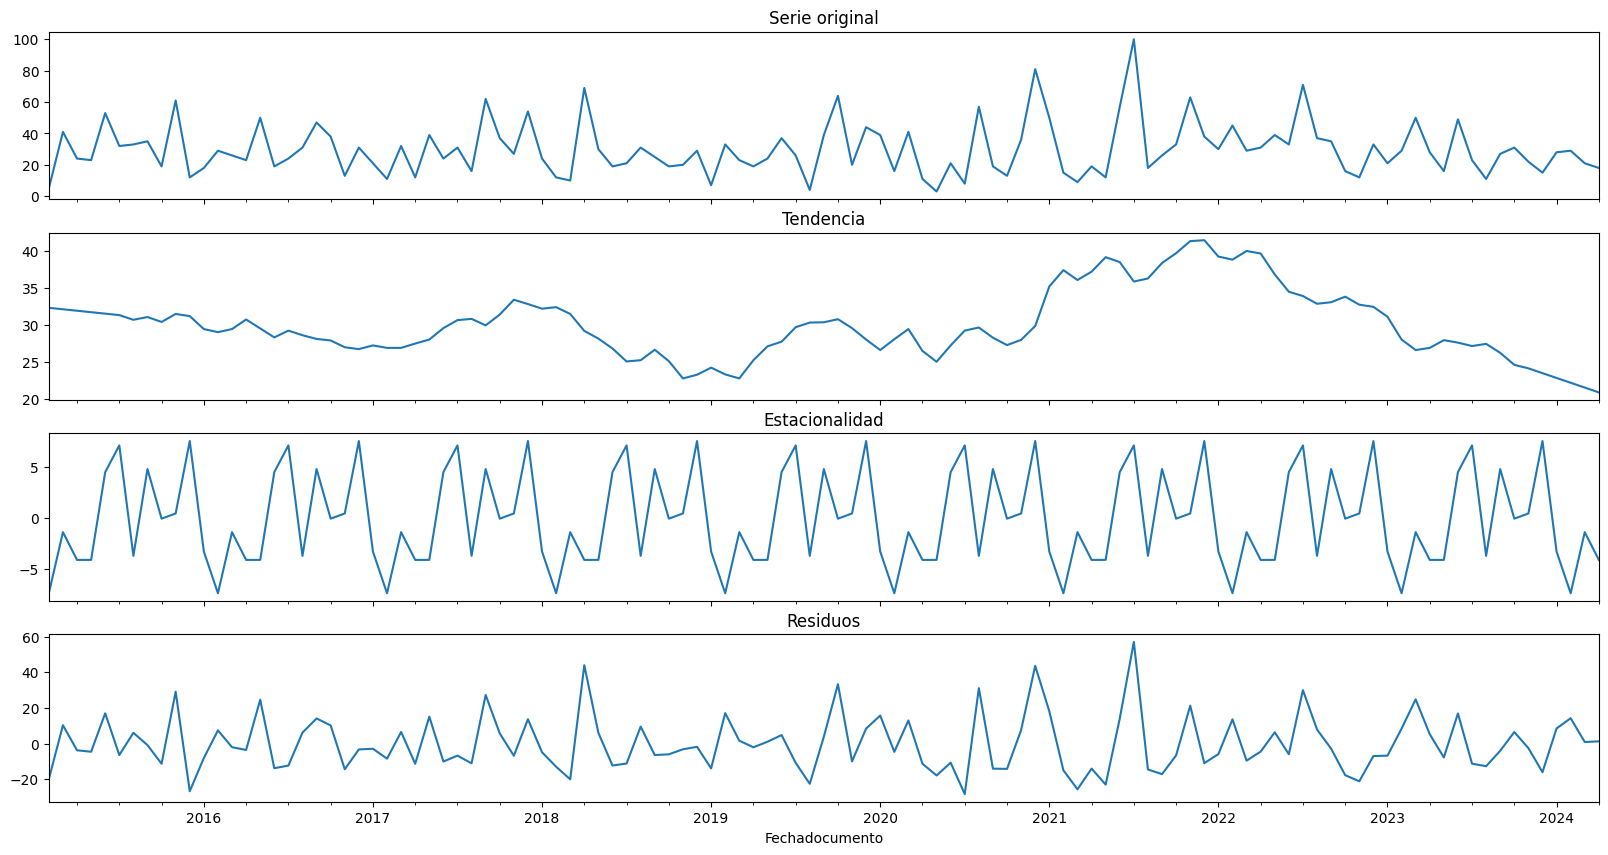

In [39]:
res_decompose_prod5 = seasonal_decompose(df_grouped5[nombres_productos[4]], model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 10), sharex=True)
res_decompose_prod5.observed.plot(ax=axs[0])
axs[0].set_title('Serie original')
res_decompose_prod5.trend.plot(ax=axs[1])
axs[1].set_title('Tendencia')
res_decompose_prod5.seasonal.plot(ax=axs[2])
axs[2].set_title('Estacionalidad')
res_decompose_prod5.resid.plot(ax=axs[3])
axs[3].set_title('Residuos')

## PRONOSTICOS PARA PRODUCTO 1

In [40]:
Periodos_pronostico = 3
train_len = df_grouped.shape[0]-Periodos_pronostico
train_td = df_grouped[:train_len]
test_td = df_grouped[train_len:]

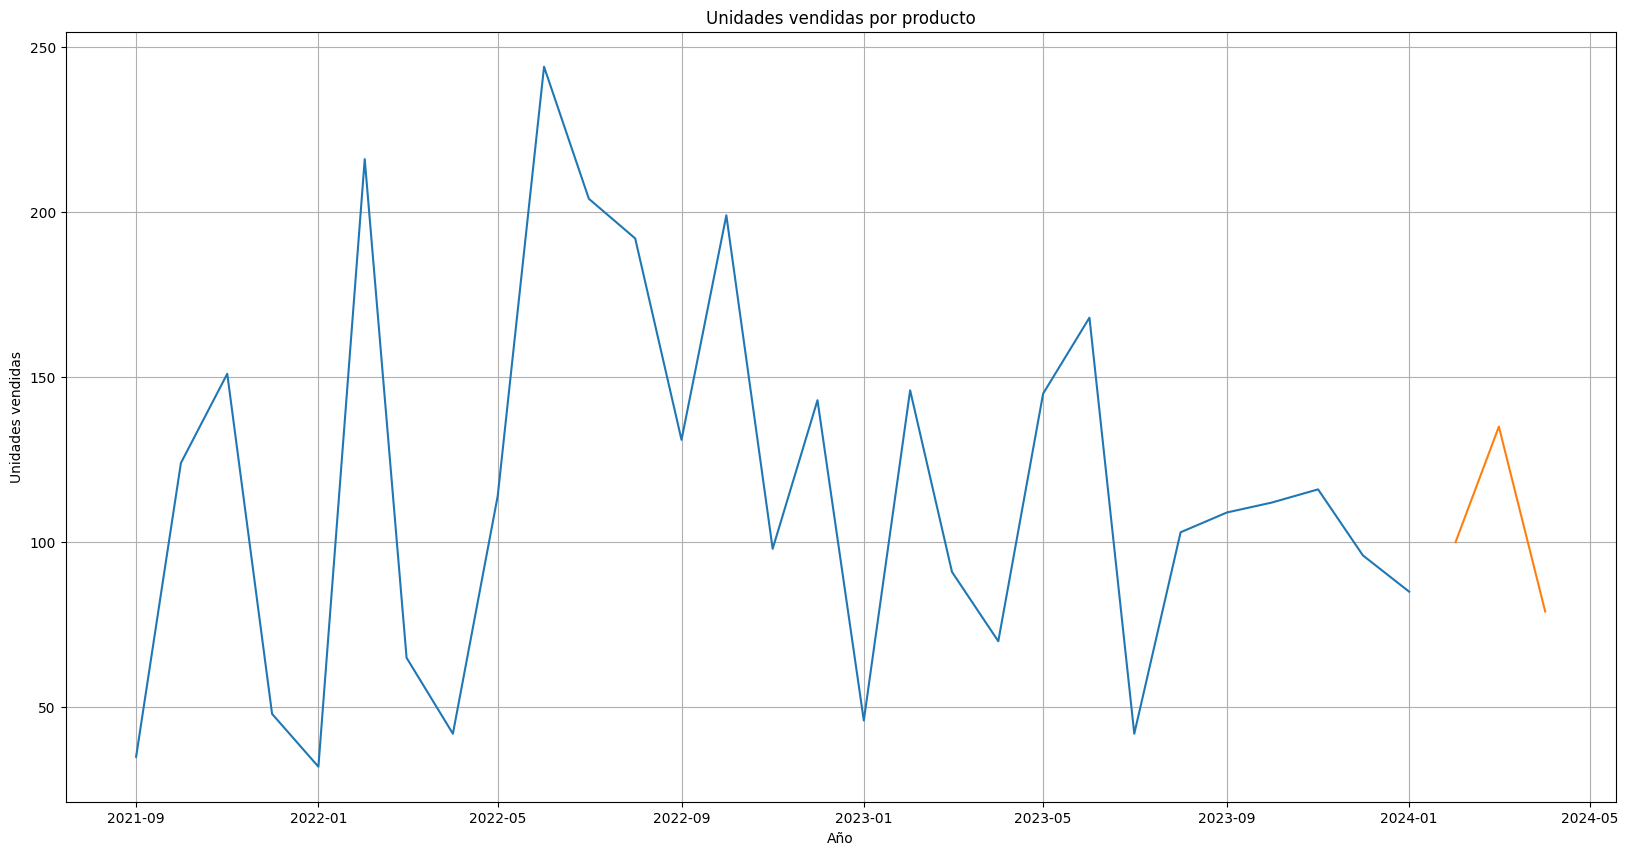

In [41]:
fig = plt.figure(figsize=(20, 10))
plt.title("Unidades vendidas por producto")
plt.xlabel("Año")
plt.ylabel("Unidades vendidas")
plt.plot(train_td[nombres_productos[0]],label= nombres_productos[0])
plt.plot(test_td[nombres_productos[0]],label= nombres_productos[0])
plt.grid()
plt.show()

### **5. Pronosticando con metodos de suavización**

#### **5.1 Promedio movil**

In [42]:
ma_2= train_td[nombres_productos[0]].rolling(2,min_periods=2).mean()
ma_3= train_td[nombres_productos[0]].rolling(3,min_periods=2).mean()
ma_4= train_td[nombres_productos[0]].rolling(4,min_periods=2).mean()
ma_5= train_td[nombres_productos[0]].rolling(5,min_periods=2).mean()

In [43]:
ma_2= train_td[nombres_productos[0]].shift().rolling(2,min_periods=2).mean()
ma_3= train_td[nombres_productos[0]].shift().rolling(3,min_periods=2).mean()
ma_4= train_td[nombres_productos[0]].shift().rolling(4,min_periods=2).mean()
ma_5= train_td[nombres_productos[0]].shift().rolling(5,min_periods=2).mean()

In [44]:
def fore_ma(datos,w,h):
  data=datos.copy()
  for x in range(1,h+1):
    ind = data.index[-1]
    value = ind + pd.DateOffset(months=1)
    data.loc[value]= data[-w:].mean()
  return data[-h:] 

In [45]:
ma_2_f= fore_ma(train_td[nombres_productos[0]],2,Periodos_pronostico)
ma_3_f= fore_ma(train_td[nombres_productos[0]],3,Periodos_pronostico)
ma_4_f= fore_ma(train_td[nombres_productos[0]],4,Periodos_pronostico)
ma_5_f= fore_ma(train_td[nombres_productos[0]],5,Periodos_pronostico)

In [46]:
rmse_ma_2 = np.sqrt(mean_squared_error(test_td[nombres_productos[0]],ma_2_f ))
rmse_ma_3 = np.sqrt(mean_squared_error(test_td[nombres_productos[0]],ma_3_f ))
rmse_ma_4 = np.sqrt(mean_squared_error(test_td[nombres_productos[0]],ma_4_f ))
rmse_ma_5 = np.sqrt(mean_squared_error(test_td[nombres_productos[0]],ma_5_f ))

In [47]:
print( rmse_ma_2, rmse_ma_3 ,rmse_ma_4 ,rmse_ma_5)

28.433126953139244 25.284146531841284 22.541138967752754 22.623791135292358


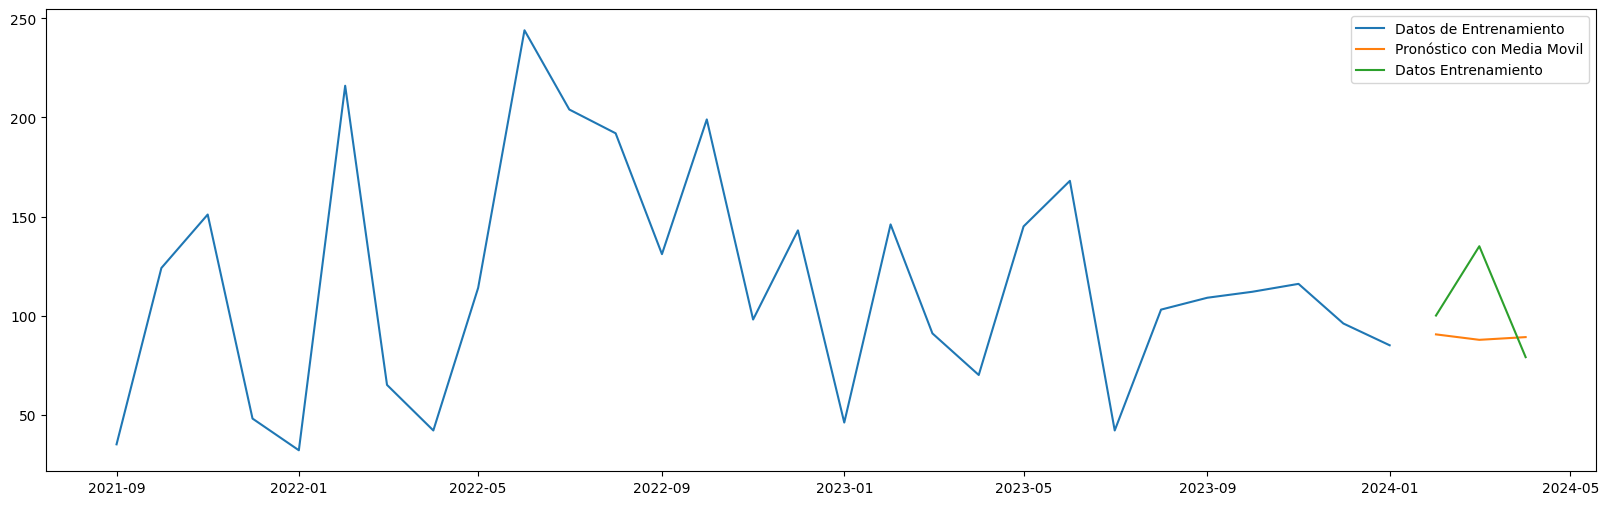

In [48]:
fig = plt.figure(figsize=(20, 6))
plt.plot(train_td[nombres_productos[0]],label="Datos de Entrenamiento")
plt.plot(ma_2_f,label="Pronóstico con Media Movil")
plt.plot(test_td[nombres_productos[0]],label="Datos Entrenamiento")
plt.legend()
plt.show()

#### **5.2 Suavizacion Exponencial Simple**

            Point_forecast  lower_95    upper_95
2024-02-01      116.103487  4.014338  228.192636
2024-03-01      116.103487  4.014338  228.192636
2024-04-01      116.103487  4.014337  228.192637


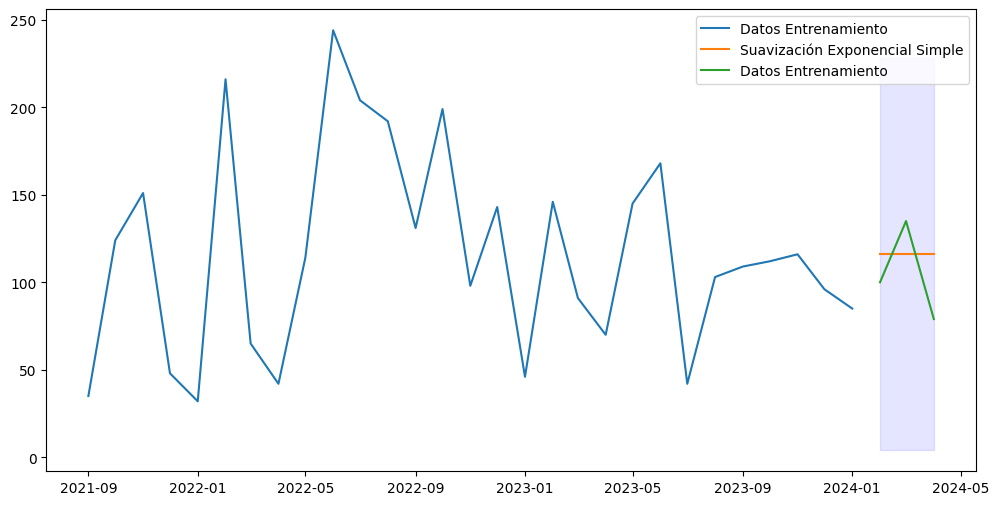

rmse:  25.775112334306936


In [49]:
ets_model = ETSModel(endog=train_td[nombres_productos[0]],error="add")#,trend="add",seasonal="mul" )
ets_result = ets_model.fit()

point_forecast=ets_result.forecast(Periodos_pronostico)

ci = ets_result.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds = pd.concat([limits, conf_forecast], axis = 1)
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds)

fig = plt.figure(figsize=(12, 6))
plt.plot(train_td[nombres_productos[0]],label="Datos Entrenamiento")
plt.plot(preds['Point_forecast'],label="Suavización Exponencial Simple")
plt.plot(test_td[nombres_productos[0]],label="Datos Entrenamiento")
plt.fill_between(preds.index ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(test_td[nombres_productos[0]],point_forecast ))
print('rmse: ',rmse)

#### **5.3 Suavizacion Exponencial Lineal (Holt)**

##### **5.3.1 Suavizacion Exponencial Lineal de Winters (Holt-Winters)**

            Point_forecast  lower_95    upper_95
2024-02-01      116.103487  4.014338  228.192636
2024-03-01      116.103487  4.014338  228.192636
2024-04-01      116.103487  4.014337  228.192637


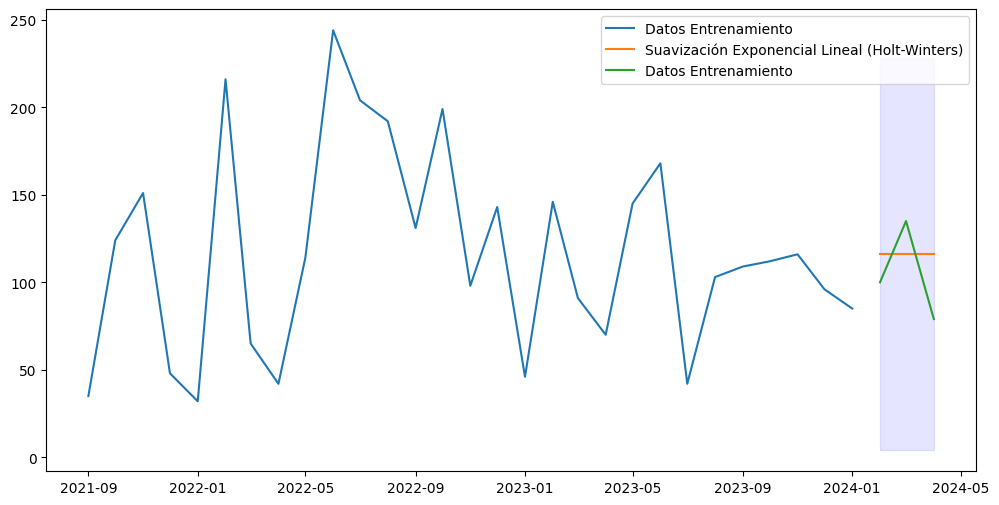

Rmse: 25.775112334306936


In [50]:

ets_model = ETSModel(endog=train_td[nombres_productos[0]],error="add",trend=None,seasonal=None )
ets_result = ets_model.fit()

point_forecast=ets_result.forecast(Periodos_pronostico)

ci = ets_result.get_prediction(start = point_forecast.index[0],
                                end = point_forecast.index[-1])

conf_forecast = ci.pred_int(alpha=0.05)#.iloc[:,0]
limits = ci.predicted_mean


preds_hw_add = pd.concat([limits, conf_forecast], axis = 1)
preds_hw_add.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds_hw_add)

fig = plt.figure(figsize=(12, 6))
plt.plot(train_td[nombres_productos[0]],label="Datos Entrenamiento")
plt.plot(preds_hw_add['Point_forecast'],label="Suavización Exponencial Lineal (Holt-Winters)")

plt.plot(test_td[nombres_productos[0]],label="Datos Entrenamiento")
plt.fill_between(preds_hw_add.index ,preds_hw_add['lower_95'], preds_hw_add['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

rmse_hw_add = np.sqrt(mean_squared_error(test_td[nombres_productos[0]],preds_hw_add['Point_forecast']))
print('Rmse:',rmse_hw_add)


### **6. Pronosticando con metodos de regresión**

#### **6.1 Autocorrelación**

Para determinar si existe autocorrelación vamos a usar la prueba de rachas propuesta por Wald y Wolfowitz, 1940. Es una prueba no paramétrica donde las hipótesis son las siguientes:

$H{0}: ρ = 0$ (Es decir no hay autocorrelación) 

$H{1}: ρ \not= 0$ (Es decir hay autocorrelación)

Rechazo $H{0}$ cuando el p-valor es menor al nivel de significancia, convencionalmente se usa un $α$=0.05 ($α$ = nivel de significancia).

In [51]:
runstest_1samp(train_td[nombres_productos[0]], correction=False)

(-0.8073848195126351, 0.4194448101612762)

In [52]:
Resul_lb_bp = sm.stats.acorr_ljungbox(train_td[nombres_productos[0]], lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

,lb_stat,lb_pvalue,bp_stat,bp_pvalue,lb_ho,bp_ho
1,0.124771,0.723917,0.112696,0.737095,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
2,0.446062,0.800090,0.392530,0.821794,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
3,0.987477,0.804282,0.846620,0.838287,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
4,3.998701,0.406182,3.275027,0.512899,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
5,6.990008,0.221384,5.590878,0.348084,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
6,7.361633,0.288694,5.866599,0.438299,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
7,8.280881,0.308479,6.518969,0.480618,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
8,8.704336,0.367848,6.805825,0.557720,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
9,10.958478,0.278566,8.260111,0.508161,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr
10,11.248765,0.338468,8.438029,0.586132,no_rechazo_ho/no_hay_autocorr,no_rechazo_ho/no_hay_autocorr


In [53]:
stats.shapiro(train_td[nombres_productos[0]])

ShapiroResult(statistic=0.9576419757595245, pvalue=0.2871985892866481)

In [54]:
stats.jarque_bera(train_td[nombres_productos[0]])

SignificanceResult(statistic=1.2518805105626039, pvalue=0.5347583826667687)

#### **6.2 Homoscedasticidad y Heteroscedasticidad**

In [55]:
sm.stats.acorr_ljungbox((train_td[nombres_productos[0]]-train_td[nombres_productos[0]].mean())**2, lags=range(1,21), return_df=True,boxpierce=True )

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.655531,0.418142,0.592093,0.441611
2,1.874971,0.391611,1.654186,0.437319
3,1.916287,0.589962,1.688838,0.639418
4,4.947087,0.292770,4.133031,0.388301
5,5.532651,0.354379,4.586371,0.468411
6,6.843718,0.335542,5.559098,0.474343
7,6.847056,0.444976,5.561467,0.591780
8,8.178455,0.416235,6.463382,0.595472
9,8.288032,0.505400,6.534077,0.685502
10,8.498316,0.580282,6.662961,0.756834


#### **6.3 Normalidad**

In [56]:
stats.shapiro(train_td[nombres_productos[0]])

ShapiroResult(statistic=0.9576419757595245, pvalue=0.2871985892866481)

In [57]:
stats.jarque_bera(train_td[nombres_productos[0]])

SignificanceResult(statistic=1.2518805105626039, pvalue=0.5347583826667687)

#### **6.4 Modelo y test**

In [58]:
month_dummies = pd.get_dummies(train_td[nombres_productos[0]].index.month,drop_first=True, dtype=int).set_index(train_td[nombres_productos[0]].index)
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
Fechadocumento,,,,,,,,,,,
2021-09-01,0,0,0,0,0,0,0,1,0,0,0
2021-10-01,0,0,0,0,0,0,0,0,1,0,0
2021-11-01,0,0,0,0,0,0,0,0,0,1,0
2021-12-01,0,0,0,0,0,0,0,0,0,0,1
2022-01-01,0,0,0,0,0,0,0,0,0,0,0
2022-02-01,1,0,0,0,0,0,0,0,0,0,0
2022-03-01,0,1,0,0,0,0,0,0,0,0,0
2022-04-01,0,0,1,0,0,0,0,0,0,0,0
2022-05-01,0,0,0,1,0,0,0,0,0,0,0


In [59]:
train_td_regression = train_td.copy()
y= train_td_regression[nombres_productos[0]]
train_td_regression["x"] = np.linspace(1,train_td_regression[nombres_productos[0]].shape[0],train_td_regression[nombres_productos[0]].shape[0])
x = np.linspace(1,train_td_regression[nombres_productos[0]].shape[0],train_td_regression[nombres_productos[0]].shape[0])
X = sm.add_constant(x)
train_td_regression["x2"] = x**2
train_td_regression["x3"] = x**3

X = sm.add_constant( pd.concat([train_td_regression[["x","x2","x3"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                                   OLS Regression Results                                  
Dep. Variable:     CALIBRADOR CON VERNIER 6"X150mm   R-squared:                       0.728
Model:                                         OLS   Adj. R-squared:                  0.456
Method:                              Least Squares   F-statistic:                     2.680
Date:                             Thu, 23 May 2024   Prob (F-statistic):             0.0378
Time:                                     16:35:33   Log-Likelihood:                -139.60
No. Observations:                               29   AIC:                             309.2
Df Residuals:                                   14   BIC:                             329.7
Df Model:                                       14                                         
Covariance Type:                         nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

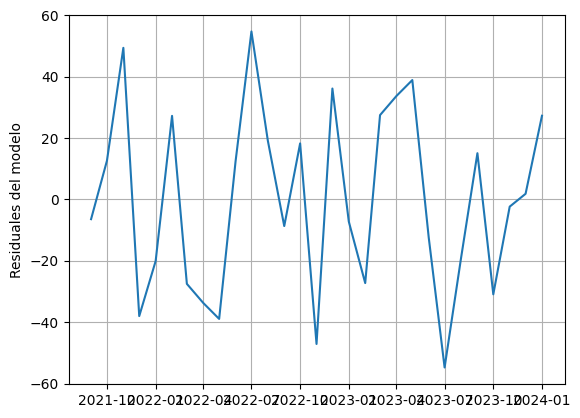

In [60]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

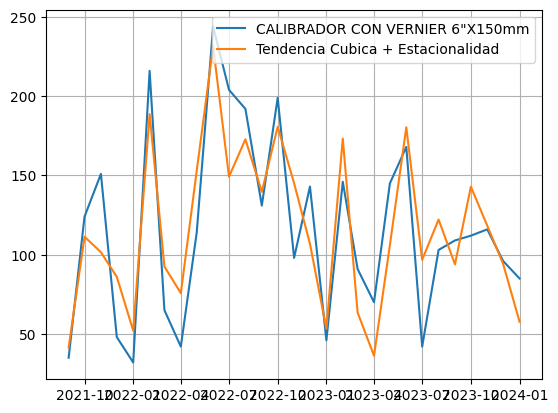

In [61]:
plt.plot(y,label=nombres_productos[0])
plt.plot(season_pol_2.fittedvalues,label="Tendencia Cubica + Estacionalidad")
plt.legend()
plt.grid()
plt.show()

In [62]:
h=12
x_for= np.linspace((train_td_regression[nombres_productos[0]].shape[0]+1),(train_td_regression[nombres_productos[0]].shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3),axis=1),columns=["x","x2","x3"] )

range_dates = pd.date_range(train_td_regression.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True, dtype=int)

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1))
X_for

dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)

pred_months = preds.iloc[:Periodos_pronostico].copy()
pred_months



,Point_forecast,lower_95,upper_95
2024-02-01,197.981477,53.522917,342.440038
2024-03-01,111.519144,-48.784394,271.822682
2024-04-01,110.661947,-70.667660,291.991555


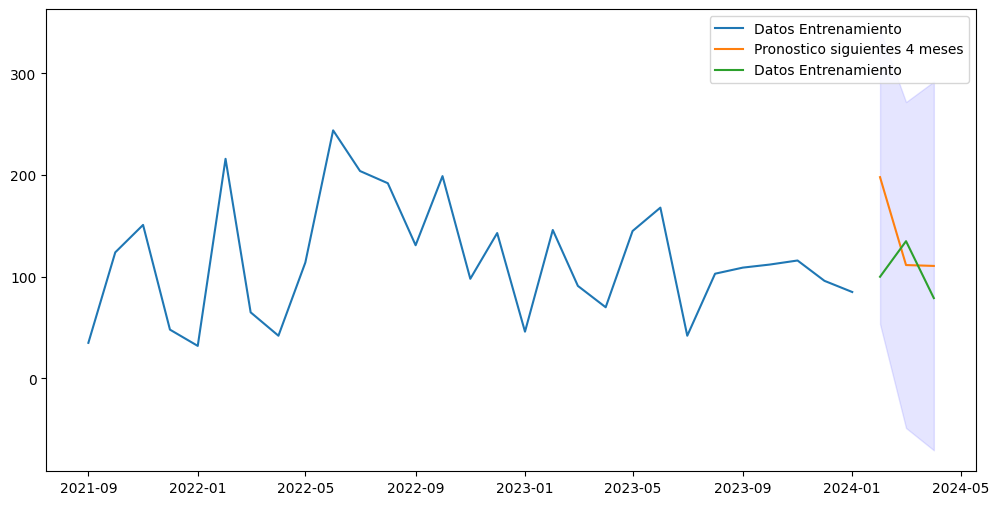

In [63]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(pred_months.index,pred_months['Point_forecast'],label="Pronostico siguientes 4 meses")
plt.fill_between(pred_months.index,pred_months['lower_95'], pred_months['upper_95'], color='blue', alpha=0.1)
plt.plot(test_td[nombres_productos[0]],label="Datos Entrenamiento")
plt.legend()
plt.show()

In [64]:
pred_months

,Point_forecast,lower_95,upper_95
2024-02-01,197.981477,53.522917,342.440038
2024-03-01,111.519144,-48.784394,271.822682
2024-04-01,110.661947,-70.667660,291.991555


In [65]:
rmse = np.sqrt(mean_squared_error(test_td[nombres_productos[0]],pred_months.Point_forecast ))
print(rmse)

60.97594994014351


### **7. Pronosticando con metodos autoregresivos y de media movil  ARIMA**

In [66]:
datos_diff_1_12 = train_td[nombres_productos[0]].diff().diff(12).dropna()

warnings.filterwarnings("ignore")
adfuller_result = adfuller(datos_diff_1_12)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
kpss_result = kpss(datos_diff_1_12)
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')
warnings.filterwarnings("default")

ADF Statistic: -11.633761954814458, p-value: 2.2301861259081934e-21
KPSS Statistic: 0.3066981572751497, p-value: 0.1


In [67]:
modelo = auto_arima(
            y                 = train_td[nombres_productos[0]],
            start_p           = 0,
            start_q           = 0,
            max_p             = 5,
            max_q             = 5,
            seasonal          = True,
            test              = 'adf',
            m                 = 12, # periodicidad de la estacionalidad
            d                 = None, # El algoritmo determina 'd'
            D                 = None, # El algoritmo determina 'D'
            trace             = True,
            error_action      = 'ignore',
            suppress_warnings = True,
            stepwise          = True
        )

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=341.971, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=332.865, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=333.758, Time=0.01 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=334.015, Time=0.21 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=333.232, Time=0.12 sec
 ARIMA(1,2,0)(2,0,1)[12]             : AIC=336.014, Time=0.22 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=341.236, Time=0.03 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=327.553, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=329.415, Time=0.24 sec
 ARIMA(2,2,0)(2,0,0)[12]             : AIC=328.805, Time=0.66 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=inf, Time=1.76 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=328.05

In [68]:
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
modelo = ARIMA(order=(2, 2, 1), seasonal_order=(0, 0, 0, 12))
modelo.fit(y=train_td[nombres_productos[0]])
modelo.summary()

C:\Users\manue\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   29
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -153.529
Date:                Thu, 23 May 2024   AIC                            317.057
Time:                        16:35:42   BIC                            323.537
Sample:                    09-01-2021   HQIC                           318.984
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0005      2.820     -0.355      0.723      -6.528       4.527
ar.L1         -0.5620      0.219     -2.571      0.010      -0.990      -0.134
ar.L2         -0.4116      0.214     -1.923      0.055      -0.831       0.008
ma.L1         -0.9998    174.349     -0.006      0.995    -342.717     340.717
sigma2      4205.5275   7.33e+05      0.006      0.995   -1.43e+06    1.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.41   Prob(JB):                         0.70
Heteroskedasticity (H):               0.23   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

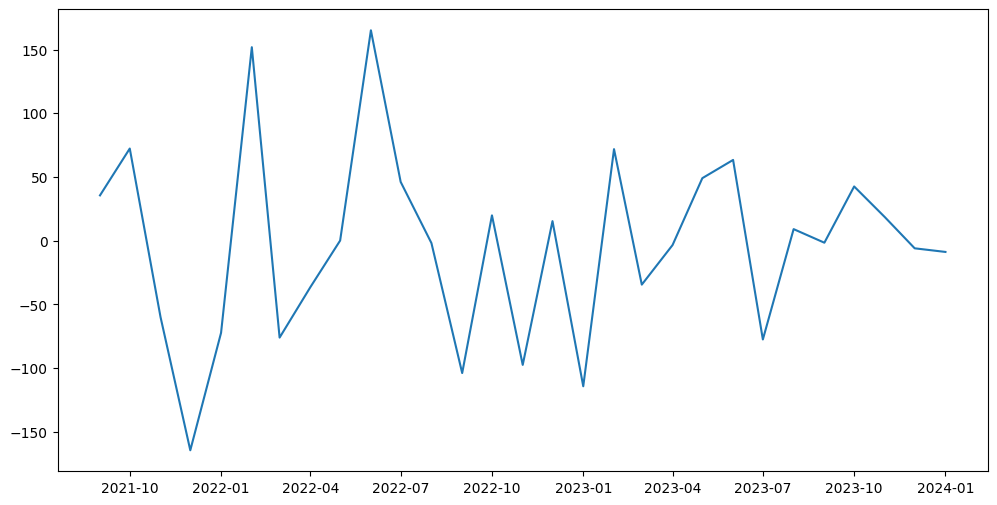

In [69]:
fig = plt.figure(figsize=(12, 6))
plt.plot(modelo.resid(),label="Residuales")

In [70]:
h= Periodos_pronostico
res = modelo.resid()

my_samples = []
for _ in range(1000):

    x = np.random.choice(res, size=h, replace=True)
    my_samples.append(x)

q1=np.quantile(my_samples,0.025,axis=0)
q2=np.quantile(my_samples,0.975,axis=0) 

fore = modelo.predict(h,return_conf_int=False)

preds = pd.DataFrame(np.column_stack([fore,fore+np.cumsum(q1) , fore+np.cumsum(q2)]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

preds


,Point_forecast,lower_95,upper_95
0,86.368956,-78.209155,251.482627
1,76.081303,-253.074918,406.308646
2,66.252453,-427.481880,561.593467


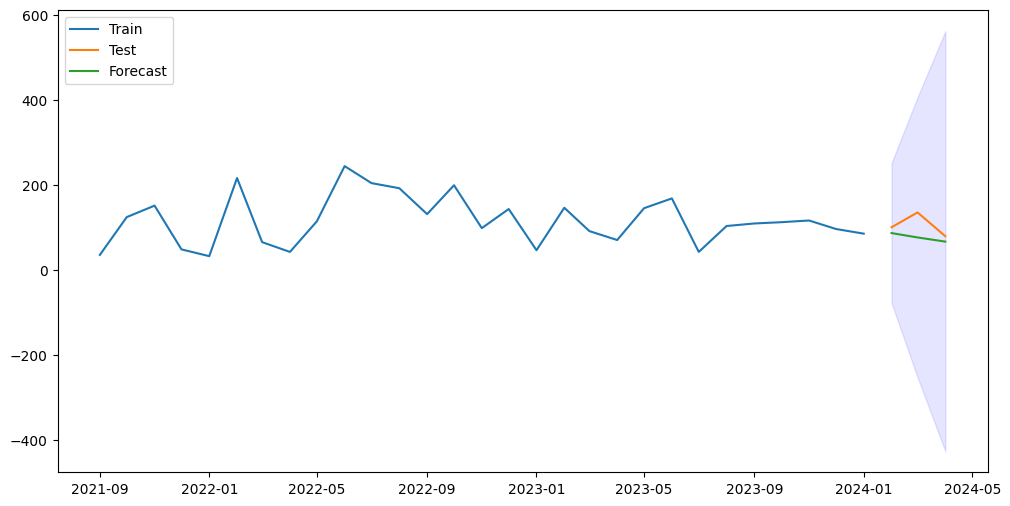

In [71]:
fig = plt.figure(figsize=(12, 6))
plt.plot(train_td[nombres_productos[0]],label="Train")
plt.plot(test_td[nombres_productos[0]],label="Test")
plt.plot(fore, label='Forecast')
plt.fill_between(fore.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend(loc='upper left')


In [72]:
rmse = np.sqrt(mean_squared_error(test_td[nombres_productos[0]],fore ))
print(rmse)

35.682479985827555


### **8. Optimización bayesiana con ARIMA y ventanas moviles**

In [73]:
def train_and_evaluate_RMSE(p,d,q):
    
    p = round(p,2)
    d = round(d,2)
    q = round(q,2)
    p1 = [0,1,2,3,4,5,6,7,8,9,10]
    d1 = [0,1,2,3,4,5,6,7,8,9,10]
    q1 = [0,1,2,3,4,5,6,7,8,9,10]


    Ventana = Periodos_pronostico - 1 
    h = 1
    timedelta = np.timedelta64(Ventana + h , 'M')

    start_date = train_td.index[0]
    end_date= train_td.index[-1] - pd.DateOffset(months=Ventana+h, hours=h)

    fechas = pd.date_range(start = start_date, end = end_date , freq='MS')
    #print(fechas)
    Predicciones = []

    for fecha in fechas:
   
       inicio_ventana = fecha       
       fin_ventana = fecha + pd.DateOffset(months=Ventana)  
       datos_ventana = train_td[nombres_productos[0]].loc[inicio_ventana:fin_ventana]

       modelo = sm.tsa.statespace.SARIMAX(datos_ventana, 
                                    order=(p1[round(p)], d1[round(d)], q1[round(q)]), 
                                    seasonal_order=(0,0,0,12), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False,
                                    freq='MS')
                                    
       output = modelo.fit()
       fecha_pred = fecha + pd.DateOffset( months=Ventana + h)
       fore = output.predict(start = fecha_pred, end = fecha_pred, dynamic= True) 
       Predicciones.append(fore)
    
    Predicciones
    df = pd.DataFrame(Predicciones)
    df_transposed = df.transpose()
    diagonal = df_transposed.values.diagonal()
    Pred_1 = pd.DataFrame({nombres_productos[0]: diagonal}, index=df_transposed.index)
    print(Pred_1)

    rmse = np.sqrt(mean_squared_error(train_td[nombres_productos[0]].loc[Pred_1.index],Pred_1 ))

    print(" target es: {}, p: {},d: {},q: {}".
          format(rmse,p,d,q))

    return -rmse

In [74]:
pbounds = {'p':  (0,9),'d':(0,3) , 'q': (0,4) }

In [75]:
optimizer = BayesianOptimization(
    f=train_and_evaluate_RMSE,
    pbounds=pbounds,
    random_state=1,
    verbose=2
)

In [76]:
warnings.filterwarnings("ignore")
optimizer.maximize(init_points=3, n_iter=23)

|   iter    |  target   |     d     |     p     |     q     |
-------------------------------------------------------------
            CALIBRADOR CON VERNIER 6"X150mm
2021-12-01                            151.0
2022-01-01                             48.0
2022-02-01                             32.0
2022-03-01                            216.0
2022-04-01                             65.0
2022-05-01                             42.0
2022-06-01                            114.0
2022-07-01                            244.0
2022-08-01                            204.0
2022-09-01                            192.0
2022-10-01                            131.0
2022-11-01                            199.0
2022-12-01                             98.0
2023-01-01                            143.0
2023-02-01                             46.0
2023-03-01                            146.0
2023-04-01                             91.0
2023-05-01                             70.0
2023-06-01                            14

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
optimizer.max

{'target': -80.3833316055014,
 'params': {'d': 1.251066014107722,
  'p': 6.482920440979423,
  'q': 0.00045749926937954655}}

In [ ]:
warnings.filterwarnings("ignore")

Ventana = Periodos_pronostico - 1 
h = 1
timedelta = np.timedelta64(Ventana + h, 'M')

start_date = train_td.index[0]
end_date= train_td.index[-1] - pd.DateOffset(months=Ventana+h, hours=h)


fechas = pd.date_range(start=start_date, end=end_date, freq='MS')
fechas

Predicciones = []

for fecha in fechas:
    # Seleccionar el rango de fechas para la ventana
    inicio_ventana = fecha
    fin_ventana = fecha + pd.DateOffset(months=Ventana)  
    
    # Seleccionar los datos dentro de la ventana
    datos_ventana = train_td[nombres_productos[0]].loc[inicio_ventana:fin_ventana]
    
    modelo = sm.tsa.statespace.SARIMAX(datos_ventana, 
                                    order=(2,2,1), 
                                    seasonal_order=(0,0,0,12), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False,
                                    freq='MS')
                                    
    # Fit the model
    output = modelo.fit()

    fecha_pred = fecha + pd.DateOffset( months=Ventana + h)  
    # Entrenar el modelo con los datos de la ventana
    
    fore = output.predict(start = fecha_pred, end = fecha_pred, dynamic= True) 

    Predicciones.append(fore)
    
Predicciones

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [77]:
df = pd.DataFrame(Predicciones)
df_transposed = df.transpose()
diagonal = df_transposed.values.diagonal()
Pred_1 = pd.DataFrame({nombres_productos[0]: diagonal}, index=df_transposed.index)
Pred_1

NameError: name 'Predicciones' is not defined

NameError: name 'Pred_1' is not defined

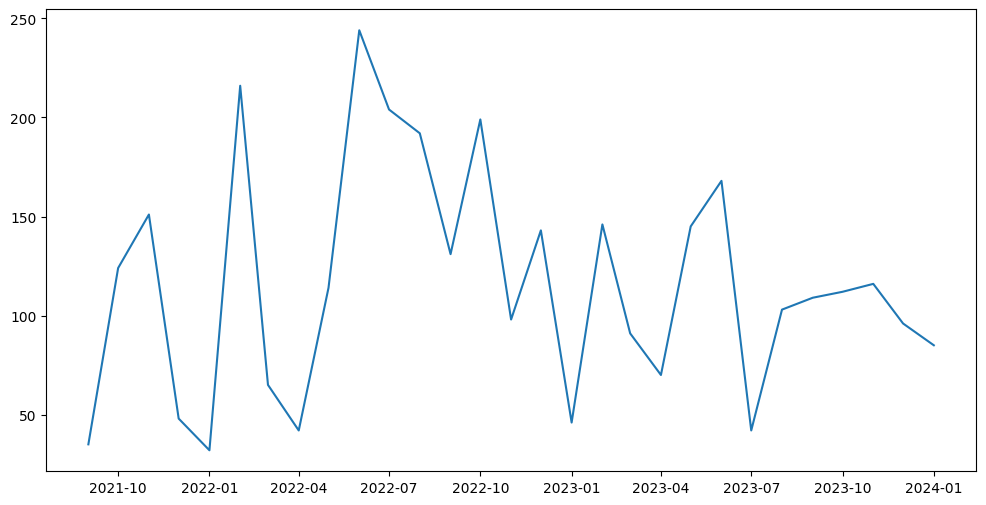

In [78]:
fig = plt.figure(figsize=(12, 6))
plt.plot(train_td.index,train_td[nombres_productos[0]],label=nombres_productos[0])
plt.plot(Pred_1, label='Prediccion')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(train_td[nombres_productos[0]].loc[Pred_1.index],Pred_1 ))
rmse

80.3833316055014

In [79]:
modelo = sm.tsa.statespace.SARIMAX(train_td[nombres_productos[0]], 
                                    order=(2,2,1), 
                                    seasonal_order=(0,0,0,12), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False,
                                    freq='MS')

In [80]:
output = modelo.fit()
inicio_pred='2024-02-01'
fin_pred = '2024-04-01'
fore = output.predict(start = inicio_pred, end = fin_pred, dynamic= True) 
fore

2024-02-01    98.013507
2024-03-01    93.082928
2024-04-01    89.029311
Freq: MS, Name: predicted_mean, dtype: float64

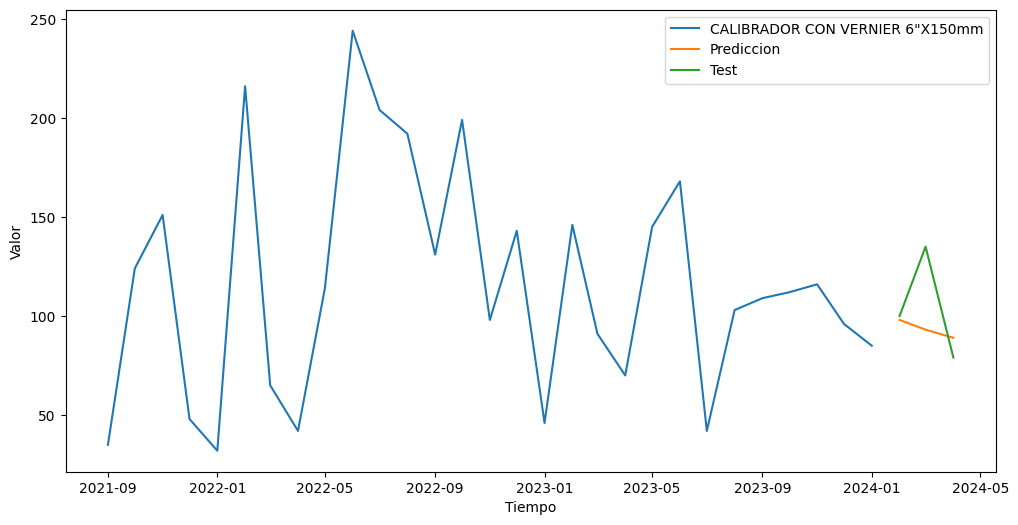

In [81]:
fig = plt.figure(figsize=(12, 6))
plt.plot(train_td.index,train_td[nombres_productos[0]],label=nombres_productos[0])
plt.plot(fore, label='Prediccion')
plt.plot(test_td[nombres_productos[0]],label="Test")
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [82]:
rmse = np.sqrt(mean_squared_error(test_td[nombres_productos[0]].loc[fore.index],fore ))
rmse

24.91033371982841

# Pruebas codigo nuevo

#### I. Promedio Movil

In [83]:
def MA_opt(fore, w, data):
    
    h = 1
    errores = []

    for n in range(2,6):
        forecast_all = []
        
        for i in range(0, fore):
            train = data[(-w-fore+i):(-fore+i)]
            datos = train.copy()

            for x in range(1,h+1):
                ind = datos.index[-1]
                value = ind + pd.DateOffset(months=1)
                datos.loc[value]= datos[-n:].mean()
            
            forecast = datos[-h:]
            forecast_all.append(forecast)

        test = data[-fore:]
        errores.append([n, mean_squared_error(test, forecast_all, squared=False)])
    
    return errores

In [84]:
Ventana_1 = 12
Ventana_2 = 24


In [85]:
fore = [Periodos_pronostico]   # Periodos usados para la evaluacion
w = [12,24]  # Tamaño de la ventana movil
resumen = []
for i in w:
    for j in fore:
        errores = MA_opt(j, i, train_td[nombres_productos[0]])
        min_valor = min(errores, key=lambda x: x[1])
        resumen.append([i, j, min_valor])

In [86]:
minimo = min(resumen, key=lambda x: x[2][1])
resultado = [minimo[0], minimo[1], minimo[2][0], minimo[2][1]]

print(f"El mejor modelo MA para el Producto 1 con un RMSE mínimo de {round(resultado[3],2)} es:\nTamaño de ventana = {resultado[0]} \
      \nPeriodos a pronosticar = {resultado[1]}\nNumero de rezagos = {resultado[2]}")

El mejor modelo MA para el Producto 1 con un RMSE mínimo de 13.88 es:
Tamaño de ventana = 12       
Periodos a pronosticar = 3
Numero de rezagos = 5


#### II. Suavizacion Exponencial Holt-Winters con optimizacion Bayesiana

In [87]:
def Holt_Winters_opt(fore, w, data):

  def objetivo(error,trend,seasonal,alpha,beta,gamma):
  
      alpha = round(alpha,2)
      beta  = round(beta,2)
      gamma = round(gamma,2)
      error1 = ["add", "mul"]
      trend1 = ["add", "mul", None]
      seasonal1 = ["add", "mul", None]

      forecast_all = []
      for i in range(0,fore):
          train = data[(-w-fore+i):(-fore+i)]
          model = ETSModel(endog = train, error = error1[round(error)], trend = trend1[round(trend)], seasonal = seasonal1[round(seasonal)])
          params = {'smoothing_level': alpha,'smoothing_trend': beta,'smoothing_seasonal':gamma}

          if trend1[round(trend)] == None:
            params.pop('smoothing_trend')
          if seasonal1[round(seasonal)] == None:
            params.pop('smoothing_seasonal')

          results = model.fit_constrained(params)
          forecast = results.forecast(1)
          forecast_all.append(forecast)

      test = data[-fore:]
      return -mean_squared_error(test, forecast_all, squared=False)

  search_space = {
     'error': (0, 1),
     'trend': (0, 2),
     'seasonal': (0, 2),
     'alpha': (0.01, 0.99),
     'beta': (0.01, 0.99),
     'gamma': (0.01, 0.99)
     }
  
  optimizer = BayesianOptimization(f = objetivo,
                                   pbounds = search_space,
                                   random_state=1,
                                   verbose=1)
  optimizer.maximize(init_points = 5, n_iter = 100)
  #print("\nFinal result:", optimizer.max)
  return optimizer

def best_model_hw(i, j, result):
   resumen = []
   error1 = ["add", "mul"]
   trend1 = ["add", "mul", None]
   seasonal1 = ["add", "mul", None]
   
   rmse_hw = round(-result.max['target'],2)
   alpha = round(result.max['params']['alpha'],2)
   beta = round(result.max['params']['beta'],2)
   gamma = round(result.max['params']['gamma'],2)
   error = error1[round(result.max['params']['error'])]
   trend = trend1[round(result.max['params']['trend'])]
   seasonal = seasonal1[round(result.max['params']['seasonal'])]

   resumen =[i, j, rmse_hw, alpha, beta, gamma, error, trend, seasonal]

   return resumen


In [90]:
fore = [3]   # 
w = [6,12]  # Tamaño de la ventana movil
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo Holt-Winters para el Producto 1, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = Holt_Winters_opt(j, i, train_td[nombres_productos[0]])
        resumen = best_model_hw(i, j, result)
        resumen_all.append(resumen)


Modelo Holt-Winters para el Producto 1, Tamaño de ventana = 6, periodos evaluados = 3
|   iter    |  target   |   alpha   |   beta    |   error   |   gamma   | seasonal  |   trend   |
-------------------------------------------------------------------------------------------------


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

In [ ]:
print('Mejores modelos con suavizacion exponencial Holt-Winters para el Producto 1:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, alfa = {resumen_all[i][3]}, beta = {resumen_all[i][4]}, gamma = {resumen_all[i][5]}, \
error = {resumen_all[i][6]}, trend = {resumen_all[i][7]}, seasonal = {resumen_all[i][8]}, RMSE = {resumen_all[i][2]}")

Mejores modelos con suavizacion exponencial Holt-Winters para el Producto 1:

w = 24, fore = 3, alfa = 0.81, beta = 0.85, gamma = 0.81, error = add, trend = mul, seasonal = None, RMSE = 13.76
w = 36, fore = 3, alfa = 0.99, beta = 0.99, gamma = 0.99, error = mul, trend = None, seasonal = None, RMSE = 13.42


#### III. Modelos polinomiales con tendencia + estacionalidad

Antes de la evaluacion de modelos se buscó el orden de los polinomios que mas se ajustan a las series de los productos

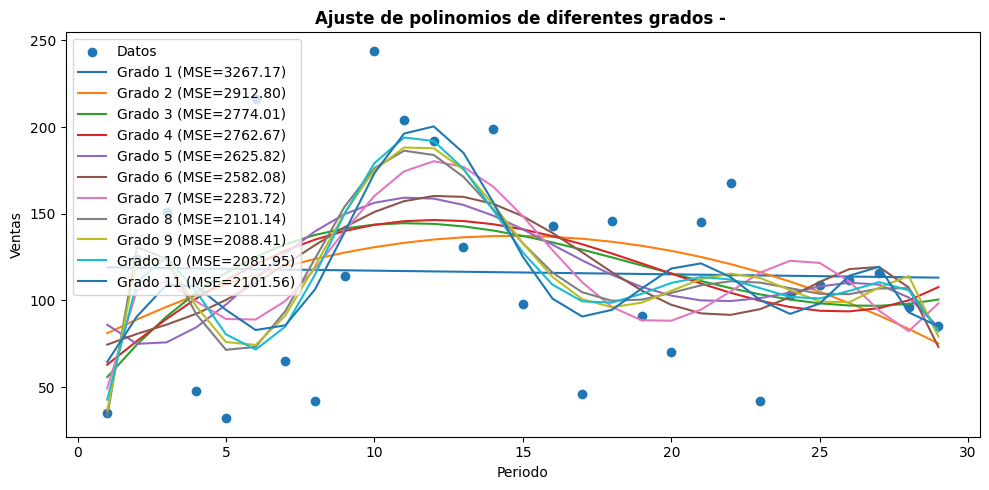

In [92]:
def eval_polin():
    x = np.arange(1, len(train_td) + 1)
    y = train_td
    # Ajuste de polinomios de diferentes grados
    degrees = [1,2,3,4,5,6,7,8,9,10,11]
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, label='Datos' )

    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        plt.plot(x, y_pred, label=f'Grado {degree} (MSE={mean_squared_error(y, y_pred):.2f})')

    plt.xlabel('Periodo')
    plt.ylabel('Ventas')
    plt.title('Ajuste de polinomios de diferentes grados - ', fontweight = 'bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

eval_polin()

In [ ]:
# Funcion para evaluar modelo con polinomio de orden 10
def pol_ord_10(fore, w, data, objetivo):
    
    
    data = data
    y_obj = objetivo
    
    forecast_all = []

    for i in range(0,fore):
        train = data[(-w-fore+i):(-fore+i)]
        y = train[y_obj]
        x = np.linspace(1,train.shape[0],train.shape[0])
        train["x"] = x
        train["x2"] = x**2
        train["x3"] = x**3
        train["x4"] = x**4
        train["x5"] = x**5
        train["x6"] = x**6
        train["x7"] = x**7
        train["x8"] = x**8
        train["x9"] = x**9
        train["x10"] = x**10
      
        month_dummies = pd.get_dummies(train.index.month,drop_first=True, dtype='int').set_index(train.index)
        X = sm.add_constant( pd.concat([train[["x","x2","x3","x4","x5","x6","x7","x8","x9","x10"]],month_dummies],axis=1) )
        model = sm.OLS(y,X)
        season_pol = model.fit()

        h=1
        x_for= np.linspace((train.shape[0]+1),(train.shape[0]+h),h)
        x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3, x_for**4, x_for**5,x_for**6,x_for**7,x_for**8,x_for**9,x_for**10),axis=1), \
                                 columns=["x","x2","x3","x4","x5","x6","x7","x8","x9","x10"] )
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=12,freq='MS')
        x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True, dtype='int').iloc[:h]
        X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies],axis=1), has_constant='add')
        
        dt = season_pol.get_prediction(X_for).summary_frame(alpha = 0.05)
        y_prd = dt['mean']
        yprd_ci_lower = dt['obs_ci_lower']
        yprd_ci_upper = dt['obs_ci_upper']
        preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
        preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
        range_dates = pd.date_range(train.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
        preds.set_index(range_dates,inplace=True)
                
        forecast_all.append(preds['Point_forecast'])
        
    test = data[-fore:]
    return mean_squared_error(test, forecast_all, squared=False)

In [ ]:
re = [3]   # Periodos usados para la evaluacion
w = [12,24]  # Tamaño de la ventana movil

print('Modelo con tendencia y estacionalidad con polinomio de orden 10 para el Producto 1:\n')
for i in w:
    for j in fore:
        result5 = pol_ord_10(j, i, train_td, nombres_productos[0])
        print(f"Tamaño de ventana = {i}, periodos evaluados = {j}, RMSE = {round(result5,2)}")

Modelo con tendencia y estacionalidad con polinomio de orden 10 para el Producto 1:

Tamaño de ventana = 12, periodos evaluados = 3, RMSE = 1681.39
Tamaño de ventana = 24, periodos evaluados = 3, RMSE = 1322.94


arima

In [93]:
def ARIMA_opt(fore, w, data):

    def objetivo(P, D, Q):

        forecast_all = []
        for i in range(0,fore):
            train = data[(-w-fore+i):(-fore+i)]
            model = ARIMA(order=(round(P), round(D), round(Q)))
            model.fit(train)
            forecast = model.predict(1).iloc[0]
            forecast_all.append(forecast)
        
        
        test = data[-fore:]
        return -mean_squared_error(test, forecast_all, squared=False)
    
    search_space = {
        'P': (1, 5),
        'D': (1, 5),
        'Q': (1, 5)}

    optimizer = BayesianOptimization(f = objetivo,
                                    pbounds = search_space,
                                    random_state = 1,
                                    verbose=1)

    optimizer.maximize(init_points = 3, n_iter = 100)
    #print("\nFinal result:", optimizer.max)
    return optimizer

def best_model_ARIMA(i, j, result):
   resumen = []

   rmse_arima = round(-result.max['target'],2)
   P = round(result.max['params']['P'])
   D = round(result.max['params']['D'])
   Q = round(result.max['params']['Q'])
   
   resumen =[i, j, rmse_arima, P, D, Q]

   return resumen

In [94]:
fore = [Periodos_pronostico]   
w = [24,36]  
resumen_all = []
for i in w:
    for j in fore:
        print(f"\nModelo ARIMA para el Producto 1, Tamaño de ventana = {i}, periodos evaluados = {j}")
        result = ARIMA_opt(j, i, train_td[nombres_productos[0]])
        resumen = best_model_ARIMA(i, j, result)
        resumen_all.append(resumen)


Modelo ARIMA para el Producto 1, Tamaño de ventana = 24, periodos evaluados = 3
|   iter    |  target   |     D     |     P     |     Q     |
-------------------------------------------------------------
| 2         | -11.99    | 2.209     | 1.587     | 1.369     |
| 15        | -7.974    | 2.203     | 1.0       | 1.0       |


ValueError: Input contains NaN.

In [ ]:
print('Mejores modelos ARIMA para el Producto 1:\n')
for i in range(0,len(resumen_all)):
    print(f"w = {resumen_all[i][0]}, fore = {resumen_all[i][1]}, P = {resumen_all[i][3]}, D = {resumen_all[i][4]}, Q = {resumen_all[i][5]}, \
RMSE = {resumen_all[i][2]}")

Mejores modelos ARIMA para el Producto 1:

w = 24, fore = 3, P = 2, D = 2, Q = 1, RMSE = 11.99
w = 36, fore = 3, P = 2, D = 2, Q = 1, RMSE = 13.05
